# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

**Author:** Shriraam Sivakumar


In [ ]:
# Import warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=FutureWarning) - Optional if deemed necessary


In [ ]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.1.4
matplotlib version: 3.8.0
seaborn version: 0.12.2


In [ ]:
# Upgrade Pandas
!pip3 install --upgrade pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 991.0 kB/s eta 0:00:12
    --------------------------------------- 0.3/11.6 MB 3.2 MB/s eta 0:00:04
   - -------------------------------------- 0.6/11.6 MB 5.0 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.6 MB 5.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.2/11.6 MB 5.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.7/11.6 MB 6.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.2/11.6 MB 7.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.6 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.7/11.6 MB 6.5 MB/s eta 0:00:02
   ---------- ----------------------------- 3.0/11.6 MB 6.3 MB/s eta 0:00:02
   ----------- ---------------------------- 3.2/11.6 MB 6.6 MB/s eta 0:00:02
   ------------ --------------------------- 3.7/11.6 MB 6.8 MB/s eta 0:00:02
   -

In [ ]:
# Upgrade Matplotlib 
!pip3 install --upgrade matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.1 MB 2.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.1 MB 5.5 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.1 MB 5.3 MB/s eta 0:00:02
   -------- ------------------------------- 1.7/8.1 MB 7.6 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.1 MB 8.1 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/8.1 MB 8.0 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 8.5 MB/s eta 0:00:01
   ----------------- ---------------------- 3.5/8.1 MB 8.7 MB/s eta 0:00:01
   -------------------- ------------------- 4.1/8.1 MB 8.8 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.1 MB 8.7 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 9.0 MB/s eta 0:00:01
   -----------------------

In [ ]:
# Upgrade Seaborn
!pip3 install --upgrade seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   --------------- ------------------------ 112.6/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions again
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [343]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [347]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\arjun\OneDrive\Desktop\Upgrad\Datasets\Datasets\Master')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()
# count = 1 <- Commented Counter - Used to identify file iteration.

# iterate through the list of files and sample one by one:
for file_name in file_list:
    # print('Count ',count)
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        temp = pd.read_parquet(file_path)
        # Add additional columns extracting the date, year and hour of pickup
        temp['tpep_pickup_date'] = temp['tpep_pickup_datetime'].dt.date
        temp['tpep_pickup_year'] = temp['tpep_pickup_datetime'].dt.year
        temp['tpep_pickup_hour'] = temp['tpep_pickup_datetime'].dt.hour

        # Restrict the data to only entries belonging to 2023 in accordance with the business requirement.
        temp = temp[temp['tpep_pickup_year'] == 2023]

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        #Extract the unique dates into a list for subsequent iteration
        dates = temp['tpep_pickup_date'].value_counts().keys()

        #Extract the unique hours into a list for subsequent iteration
        hours = temp['tpep_pickup_hour'].value_counts().keys()

        # counter = 1 <- Commented Counter - Used to identify group interation

        # I had initially used nested loops to run the below operation. However, this code was taking ~15 minutes to run.
        # I thus searched the internet and found the below procedure where pandas internally optimizes the operation. Being candid here.
        for (date, hour), group in temp.groupby(['tpep_pickup_date','tpep_pickup_hour']):
            # Extract 5% samples from every (date,hour) group
            sample = group.sample(frac=0.05, random_state=50)
            # Concatenate the extracted samples into the sampled_data frame.
            sampled_data = pd.concat([sampled_data,sample],ignore_index=True)
            #print(counter) <--- Commented counter print
            #counter = counter + 1 <--- Commented counter increment
                
        # Concatenate the sampled data of all the (date,hour) groups to the master dataframe
        df = pd.concat([df,sampled_data],ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

    #count = count + 1 <--- Commented counter increment

print(df.shape)

(1896399, 23)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

df.to_parquet(r'C:\Users\arjun\OneDrive\Desktop\Upgrad\Datasets\Datasets\Master\2023_consolidation-1.parquet')


In [67]:
# We now have to downsample our data to between 250,000 to 300,000 records.
# This will be done while maintaining the original proportional distribution across below fields - Weighted Sampling.
# tpep_pickup_date
# tpep_pickup_hour

# In my opinion, weighted sampling is more effective than random sampling.
# This will help better align with the original business objectives - obtain demand distribution and optimize decisions.

# Proceeding with propsed target sample_size as 275000.

target = 275000
total_rows = len(df)

# Rounding the corresponding percentage to two decimal places
percent = round(target / len(df),2)

#Grouping the data based on the above chosen fields and then performing weighted sampling.
grp = df.groupby(['tpep_pickup_date','tpep_pickup_hour'])

#Group is a pandas groupby object and thus doesn't have the sample method. Hence we are using lambda via apply for sampling.
grp_sample = grp.apply(lambda x: x.sample(frac = percent, random_state=50))

#Reset index while ensuring there's no separate index column of old index
df_final = grp_sample.reset_index(drop=True)
print(df_final.shape)

df_final.to_parquet(r'C:\Users\arjun\OneDrive\Desktop\Upgrad\Datasets\Datasets\Master\2023_sampled_final.parquet')

(284495, 23)


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [1274]:
# Load the new data file

df = pd.read_parquet(r'C:\Users\arjun\OneDrive\Desktop\Upgrad\Datasets\Datasets\Master\2023_sampled_final.parquet')


In [1276]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_date,tpep_pickup_year,tpep_pickup_hour,Airport_fee
0,2,2023-01-01 00:47:18,2023-01-01 01:12:29,1.0,3.88,1.0,N,148,246,1,...,9.12,0.00,1.0,39.52,2.5,0.0,2023-01-01,2023,0,NaN
1,2,2023-01-01 00:41:50,2023-01-01 01:14:50,NaN,10.77,NaN,None,151,106,0,...,11.19,6.55,1.0,67.12,NaN,NaN,2023-01-01,2023,0,NaN
2,2,2023-01-01 00:49:43,2023-01-01 01:06:26,4.0,1.16,1.0,N,164,186,1,...,2.98,0.00,1.0,22.88,2.5,0.0,2023-01-01,2023,0,NaN
3,2,2023-01-01 00:14:50,2023-01-01 00:25:52,1.0,0.87,1.0,N,170,233,1,...,3.92,0.00,1.0,19.62,2.5,0.0,2023-01-01,2023,0,NaN
4,2,2023-01-01 00:51:08,2023-01-01 00:56:01,1.0,0.89,1.0,N,263,140,1,...,1.50,0.00,1.0,13.70,2.5,0.0,2023-01-01,2023,0,NaN


In [1278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284495 entries, 0 to 284494
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284495 non-null  int64         
 1   tpep_pickup_datetime   284495 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284495 non-null  datetime64[us]
 3   passenger_count        274181 non-null  float64       
 4   trip_distance          284495 non-null  float64       
 5   RatecodeID             274181 non-null  float64       
 6   store_and_fwd_flag     274181 non-null  object        
 7   PULocationID           284495 non-null  int64         
 8   DOLocationID           284495 non-null  int64         
 9   payment_type           284495 non-null  int64         
 10  fare_amount            284495 non-null  float64       
 11  extra                  284495 non-null  float64       
 12  mta_tax                284495 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [1282]:
# Fix the index and drop any columns that are not needed
# Index values were already fixed as part of previous exercise

# Following Columns will be dropped:
# store_and_fwd_flag - Not relevant to our business case
# mta_tax - fixed amount of $0.50
# improvement_surcharge - fixed amount of $0.30
# tpep_pickup_year - we have already confirmed that all data belongs to 2023 in previous section.

df = df.drop(columns=['store_and_fwd_flag','mta_tax','improvement_surcharge','tpep_pickup_year'])
df.columns

# Checking other columns to look for drop eligibility
df.RatecodeID.value_counts() # 250k+ records had value 1.0. Thus it isn't of much significance to us. However, it is being evaluated later. Hence retaining.
df.congestion_surcharge.value_counts() # 250k+ records had value 1.0. Thus it isn't of much significance to us. However, it is being evaluated later. Hence retaining.
df.payment_type.value_counts() # 220k+ recoeds had value 1. Thus it looks like most passengers preferred to pay via cerdit card. However, it is being evaluated later. Hence retaining.
df.extra.value_counts() # Per data dictionary it includes rush hour and overnight charges. But it is fairly distributed. Hence retaining for now.
df.VendorID.value_counts() # This is either 1 or 2. Candidate for dropping but retaining since it is being analysed later.

df.columns




Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee',
       'tpep_pickup_date', 'tpep_pickup_hour', 'Airport_fee'],
      dtype='object')

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [1285]:
# Combine the two airport fee columns


# Upon checking the df info output, we see that the sum of the two Airport_fee fields equate to ~total record count value. Hence it could be misspelt by case.
print(df.airport_fee.value_counts())
print(df.Airport_fee.value_counts())
#df.info()

# Evaluating further, we see that in those rows where 'Airport_fee' has null values, 'airport_fee' more or less has non-null values.
# This further confirms our suspicion of misspelling due to case of 'A'/'a' in the Column name

print(df['Airport_fee'].isna().sum())
print(df['airport_fee'].isna().sum())
df[df['Airport_fee'].isna()]['airport_fee'].value_counts()

# Combine the two columns -> Rows where 'Airport_fee' has Null values will be assigned the 'airport_fee' value.
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])

# Finally drop the airport_fee column
df = df.drop(columns=['airport_fee'])
df.info()


airport_fee
 0.00    20251
 1.25     2035
-1.25        1
Name: count, dtype: int64
Airport_fee
 0.00    229309
 1.75     18487
 1.25      4094
-1.75         4
Name: count, dtype: int64
32601
262208
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284495 entries, 0 to 284494
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284495 non-null  int64         
 1   tpep_pickup_datetime   284495 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284495 non-null  datetime64[us]
 3   passenger_count        274181 non-null  float64       
 4   trip_distance          284495 non-null  float64       
 5   RatecodeID             274181 non-null  float64       
 6   PULocationID           284495 non-null  int64         
 7   DOLocationID           284495 non-null  int64         
 8   payment_type           284495 non-null  int64         
 9   fare_amount            284

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [1288]:
# check where values of fare amount are negative

print(df['fare_amount'].info())
print(df['fare_amount'].min())
print('Total Rows with negative fare amount = ', len(df[df['fare_amount'] < 0]))

# We see from the info() output that all rows are non-null and are of float64 datatype.
# The min() output has confirmed that the minimal value of fare_amount in the data set is 0. 
# The final expression has confirmed that there are 0 rows with fare_amount as negative.


<class 'pandas.core.series.Series'>
RangeIndex: 284495 entries, 0 to 284494
Series name: fare_amount
Non-Null Count   Dtype  
--------------   -----  
284495 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB
None
0.0
Total Rows with negative fare amount =  0


Did you notice something different in the `RatecodeID` column for above records?

In [1291]:
# Analyse RatecodeID for the negative fare amounts
# There are no rows with negative fare amounts. However, it can be analysed as below if it exists.

df[df['fare_amount'] < 0]['RatecodeID'].value_counts()


Series([], Name: count, dtype: int64)

In [1293]:
# Find which columns have negative values

df.describe()
# As per the describe output, columns total_amount and Airport_fee have negative values.
print(df[df['total_amount']<0]['total_amount'].value_counts())
print(df[df['Airport_fee']<0]['Airport_fee'].value_counts())



total_amount
-4.00    7
-5.75    3
-5.25    1
-3.25    1
-1.50    1
Name: count, dtype: int64
Airport_fee
-1.75    4
-1.25    1
Name: count, dtype: int64


In [1295]:
# fix these negative values
# We have a total of ~284500 records out of which these negative value records form a negligeable number <=18. We shall thus be dropping them.
df = df[~(df['total_amount']<0)]
df = df[~(df['Airport_fee']<0)]
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
Index: 284482 entries, 0 to 284494
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284482 non-null  int64         
 1   tpep_pickup_datetime   284482 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284482 non-null  datetime64[us]
 3   passenger_count        274168 non-null  float64       
 4   trip_distance          284482 non-null  float64       
 5   RatecodeID             274168 non-null  float64       
 6   PULocationID           284482 non-null  int64         
 7   DOLocationID           284482 non-null  int64         
 8   payment_type           284482 non-null  int64         
 9   fare_amount            284482 non-null  float64       
 10  extra                  284482 non-null  float64       
 11  tip_amount             284482 non-null  float64       
 12  tolls_amount           284482 non-null  float64  

(284482, 18)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [1299]:
# Find the proportion of missing values in each column
# The below expression provides the percentage of missing values per column

print(df.isna().sum()*100/len(df))


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.625537
trip_distance            0.000000
RatecodeID               3.625537
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
congestion_surcharge     3.625537
tpep_pickup_date         0.000000
tpep_pickup_hour         0.000000
Airport_fee              3.625537
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [1302]:
# Display the rows with null values
print(df[df.isna().any(axis=1,)])
print(df.passenger_count.value_counts())

# Impute NaN values in 'passenger_count'
# The missing (NAN) values are being imputed with the median value. This is a better statistical parameter to impute in this case.
df.passenger_count.describe()
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())

# Here, the zero values are also imputed with the median value. This is because we are operating on a subset of larger dataset and thus preserving size.
# If this were the larger data set and the percentage of 0 values were this less, we would've dropped it.

df.loc[df['passenger_count']==0.0,'passenger_count'] = df['passenger_count'].median()
print(df.passenger_count.value_counts())


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
14             2  2023-01-01 00:54:00   2023-01-01 01:09:00              NaN   
15             2  2023-01-01 00:54:47   2023-01-01 01:09:55              NaN   
18             1  2023-01-01 00:16:55   2023-01-01 00:21:36              NaN   
29             2  2023-01-01 00:10:20   2023-01-01 00:26:47              NaN   
...          ...                  ...                   ...              ...   
284466         2  2023-12-31 22:03:13   2023-12-31 22:27:29              NaN   
284486         2  2023-12-31 23:30:48   2023-12-31 23:42:49              NaN   
284487         1  2023-12-31 23:29:57   2023-12-31 23:51:06              NaN   
284488         2  2023-12-31 23:05:31   2023-12-31 23:11:22              NaN   
284492         2  2023-12-31 23:15:43   2023-12-31 23:23:27              NaN   

        trip_distance  RatecodeID  PULo

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [1306]:
# Fix missing values in 'RatecodeID'

#print(df.isna().sum())
#print(df.RatecodeID.value_counts())

# The missing (NAN) values are once again being imputed with the median value. This is a better statistical parameter to impute in this case.
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].median())
df.RatecodeID.value_counts()
df.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
tip_amount                   0
tolls_amount                 0
total_amount                 0
congestion_surcharge     10314
tpep_pickup_date             0
tpep_pickup_hour             0
Airport_fee              10314
dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [1309]:
# handle null values in congestion_surcharge

#print(df.isna().sum())
#print(df.congestion_surcharge.value_counts())

# The missing (NAN) values are once again being imputed with the median value. This is a better statistical parameter to impute in this case.
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())
df.congestion_surcharge.value_counts()
df.isna().sum()


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
tip_amount                   0
tolls_amount                 0
total_amount                 0
congestion_surcharge         0
tpep_pickup_date             0
tpep_pickup_hour             0
Airport_fee              10314
dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [1312]:
# Handle any remaining missing values
#print(df.isna().sum())

#The Airport_fee column was found to have NaN values.
df.Airport_fee.value_counts()

# The missing (NAN) values are once again being imputed with the median value. This is a better statistical parameter to impute in this case.
df['Airport_fee'] = df['Airport_fee'].fillna(df['Airport_fee'].median())
df.Airport_fee.value_counts()
df.isna().sum()


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
tip_amount               0
tolls_amount             0
total_amount             0
congestion_surcharge     0
tpep_pickup_date         0
tpep_pickup_hour         0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

passenger_count
1.0    220806
2.0     41497
3.0     10388
4.0      5779
5.0      3609
6.0      2400
8.0         2
7.0         1
Name: count, dtype: int64
trip_distance
0.00     5699
0.90     3932
1.00     3839
1.10     3781
0.80     3737
         ... 
29.94       1
22.92       1
28.15       1
36.44       1
31.82       1
Name: count, Length: 2999, dtype: int64
fare_amount
9.30      12582
10.00     12281
7.90      12273
8.60      12247
10.70     11669
          ...  
141.30        1
33.34         1
62.67         1
29.06         1
7.28          1
Name: count, Length: 4070, dtype: int64
extra
0.00     114141
2.50      69717
1.00      54402
5.00      20070
3.50      16065
7.50       2430
6.00       2346
4.25        962
9.25        957
1.75        507
6.75        374
3.75        364
2.75        343
8.75        342
10.25       256
1.25        218
11.75       196
7.75        194
6.25        121
2.25        112
10.00        79
9.75         77
7.25         70
11.25        57
8.50         55
3.20

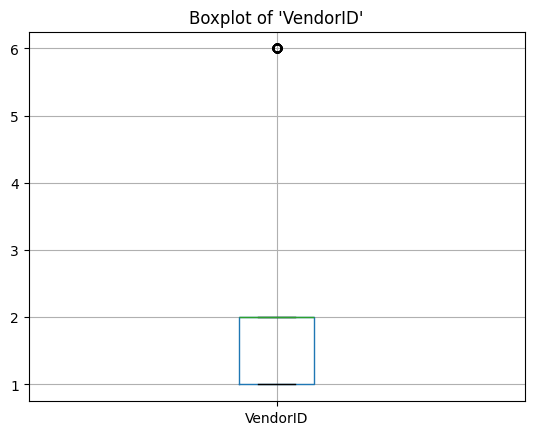

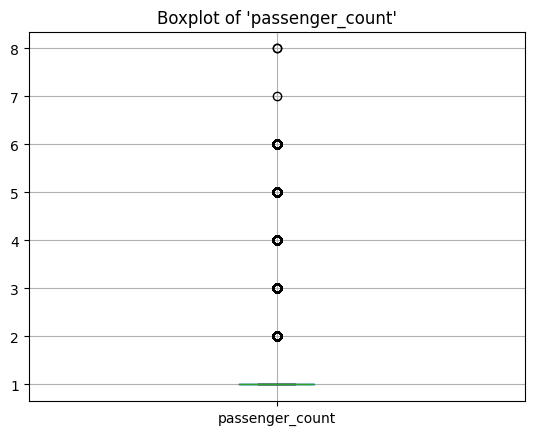

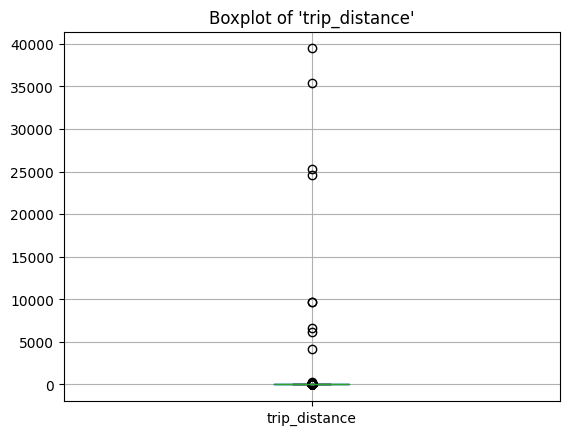

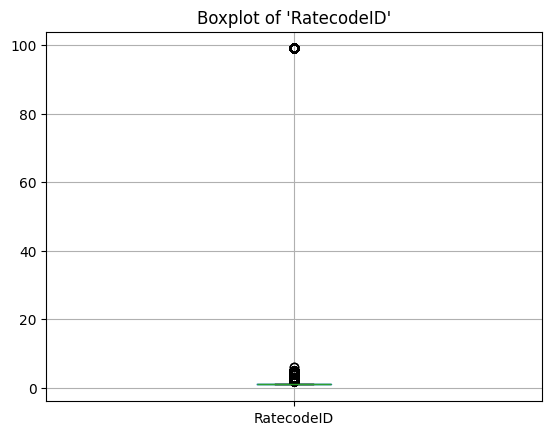

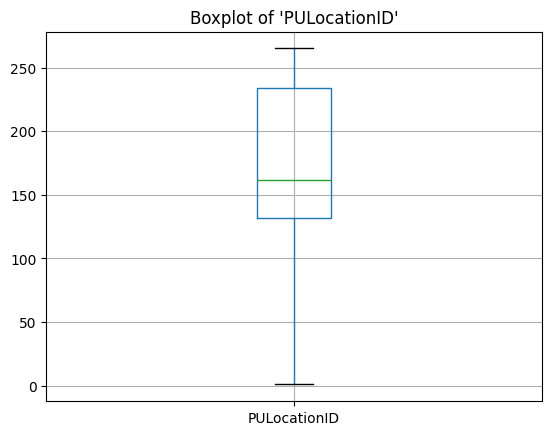

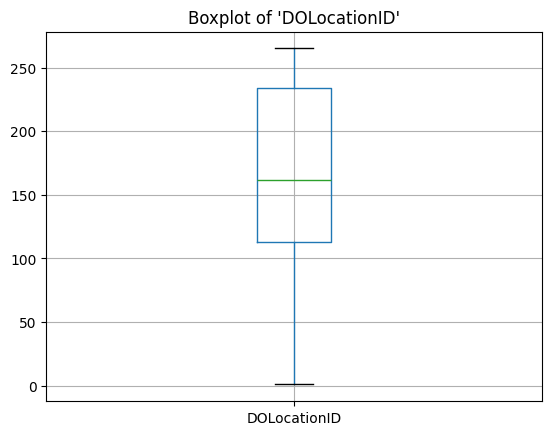

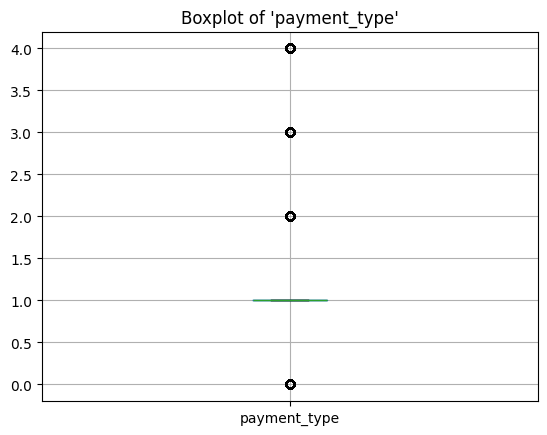

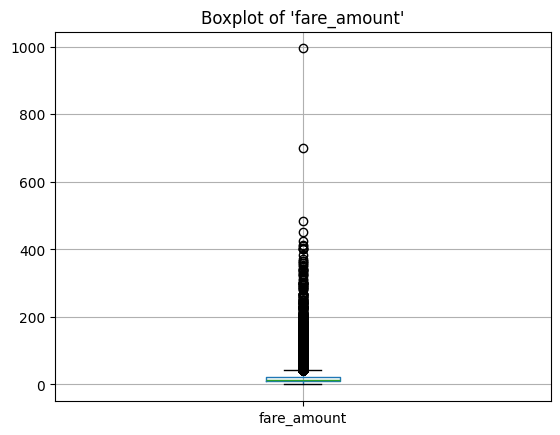

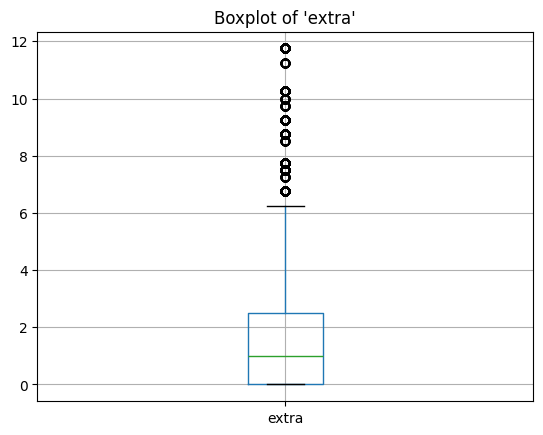

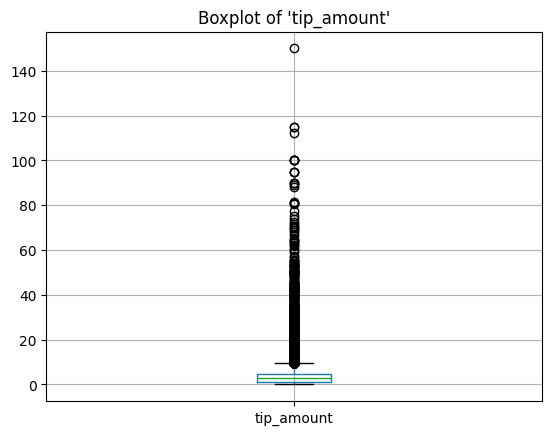

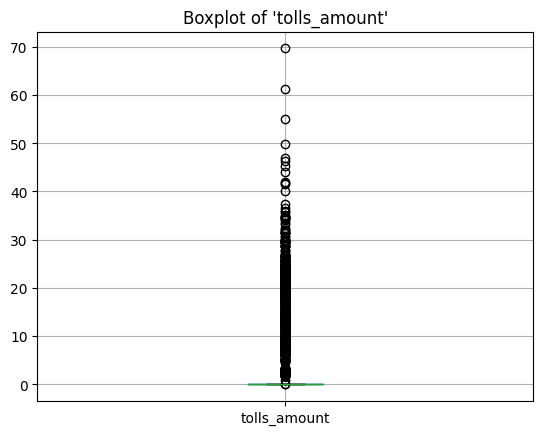

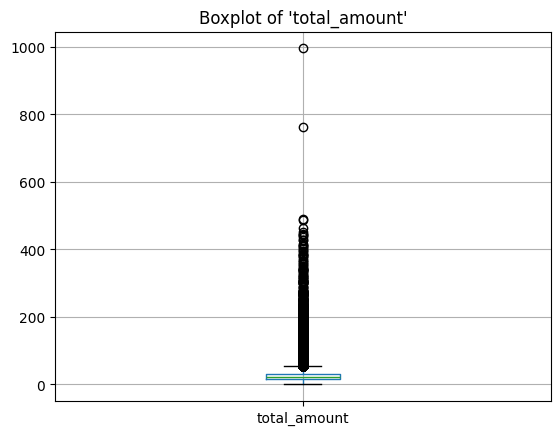

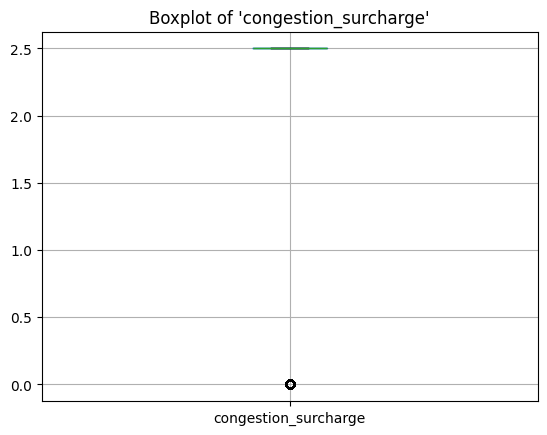

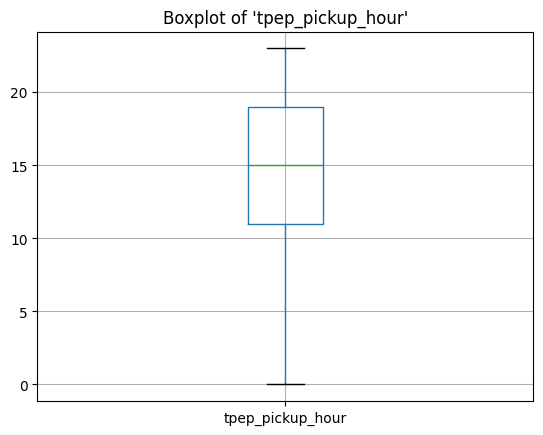

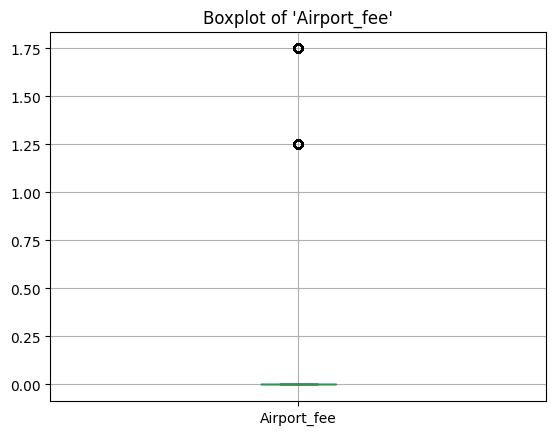

In [1316]:
# Describe the data and check if there are any potential outliers present
df.describe()

# Check for potential out of place values in various columns
print(df.passenger_count.value_counts())
print(df.trip_distance.value_counts())
print(df.fare_amount.value_counts())
print(df.extra.value_counts())
print(df.tip_amount.value_counts())
print(df.tolls_amount.value_counts())
print(df.total_amount.value_counts())

# There appear to be potential outliers in these columns - passenger_count, trip_distance, fare_amount, extra, tip_amount, tolls_amount, total_amount
# Check using Boxplot
num_col = df.select_dtypes(include='number').columns
for col in num_col:
    df.boxplot(column=[col])
    plt.title(f"Boxplot of '{col}'")
    plt.grid(True)
    plt.show()





**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [1320]:
# remove passenger_count > 6
df = df[df['passenger_count'] < 7 ]
print(df.columns)
print(df.shape)
df.describe()

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge',
       'tpep_pickup_date', 'tpep_pickup_hour', 'Airport_fee'],
      dtype='object')
(284479, 18)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,tpep_pickup_hour,Airport_fee
count,284479.000000,284479,284479,284479.000000,284479.000000,284479.000000,284479.000000,284479.000000,284479.000000,284479.000000,284479.000000,284479.000000,284479.000000,284479.000000,284479.000000,284479.000000,284479.000000
mean,1.735246,2023-07-02 19:28:22.078835,2023-07-02 19:45:51.801289,1.372773,4.033422,1.629526,165.188594,164.010855,1.159829,19.934549,1.582458,3.565182,0.604604,29.028551,2.315197,14.264659,0.140649
min,1.000000,2023-01-01 00:04:28,2023-01-01 00:09:49,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2023-04-02 15:41:44,2023-04-02 15:59:14.500000,1.000000,1.050000,1.000000,132.000000,113.000000,1.000000,9.300000,0.000000,1.000000,0.000000,16.000000,2.500000,11.000000,0.000000
50%,2.000000,2023-06-27 15:16:51,2023-06-27 15:36:03,1.000000,1.800000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,2.850000,0.000000,21.200000,2.500000,15.000000,0.000000
75%,2.000000,2023-10-06 19:16:46,2023-10-06 19:33:38.500000,1.000000,3.410000,1.000000,234.000000,234.000000,1.000000,22.600000,2.500000,4.450000,0.000000,31.045000,2.500000,19.000000,0.000000
max,6.000000,2023-12-31 23:54:53,2024-01-01 11:10:03,6.000000,39483.360000,99.000000,265.000000,265.000000,4.000000,995.000000,11.750000,150.000000,69.690000,996.000000,2.500000,23.000000,1.750000
std,0.447060,NaN,NaN,0.865852,123.564969,7.374491,63.999746,69.807207,0.508337,18.418629,1.828209,4.076742,2.185155,23.013322,0.654107,5.807458,0.461399


In [1321]:
# Continue with outlier handling
#df.value_counts()

#1. Convert RateCodeID to int64 to match dictionary and remove those that aren't within 1-6.
#df.RatecodeID.value_counts()
df['RatecodeID'] = df['RatecodeID'].astype(int)
df = df[df['RatecodeID'].isin(range(1,7))]
#df.RatecodeID.value_counts()
#print(df.shape)

#2. Remove payment_type that aren't within 1-6
df = df[df['payment_type'].isin(range(1,7))]
#df.payment_type.value_counts()
#print(df.shape)

#3. Check for tpep_pickup_datetime > tpep_dropoff_datetime and remove such records
df = df[df['tpep_pickup_datetime'] < df['tpep_dropoff_datetime']]
#print(df.shape)

#4. Remove rows with trip_distance ~0 but fare_amount > 300
df = df[~((df.trip_distance <= 1.0) & (df.fare_amount > 300))] 
#print(df.shape)

#5. Remove rows with (trip_distance = 0 or fare_amount = 0) and (pickup zone != drop zone)
df = df[~(((df.trip_distance==0)|(df.fare_amount==0)) & (df.PULocationID != df.DOLocationID))]
#print(df.shape)

#6. Remove rows where trip_distance > 250 miles.
df = df[df.trip_distance <= 250]
#print(df.shape)

#7. Per data dictionary Airport_fee = 0.00 or 1.25. So remove anything else
df = df[df.Airport_fee.isin([0.00, 1.25])]
#print(df.shape)

#8. There are a large number of extra values outside of the expected values of 0.0, 0.5, 1.0, 1.5. But these are being flagged + retained for the data in other columns.   
df.extra.value_counts()

#9. Retain rows only where total_amount >= fare_amount
df = df[df.total_amount >= df.fare_amount]
#print(df.shape)

#10. Remove tip outliers. We're taking 150% of fare_amount as the boundary condition
df = df[(df['tip_amount']/df['fare_amount']) <= 1.5]
#print(df.shape)

#11. There was a single record where the fare_amount was 700.0 and the trip_distance was 122.68. Though legitimate, we'll be removing this record.
df = df[df.fare_amount <= 500]
print(df.shape)

# 12. There can be additional filtering done such as get the trip duration and remove trips that are extremely short. But limiting the filtering for brevity.

(252832, 18)


In [1322]:
# Do any columns need standardising?

# The RatecodeID and paymet_type fields were already standardised to the int dtype as part of previous analysis.
# Proceeding to do the same for passenger_count

df.passenger_count = df.passenger_count.astype(int)
df.info()
df.RatecodeID = df.RatecodeID.astype('category')
df.payment_type = df.payment_type.astype('category')
df.PULocationID = df.PULocationID.astype('category')
df.DOLocationID = df.DOLocationID.astype('category')

df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 252832 entries, 0 to 284493
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               252832 non-null  int64         
 1   tpep_pickup_datetime   252832 non-null  datetime64[us]
 2   tpep_dropoff_datetime  252832 non-null  datetime64[us]
 3   passenger_count        252832 non-null  int32         
 4   trip_distance          252832 non-null  float64       
 5   RatecodeID             252832 non-null  int32         
 6   PULocationID           252832 non-null  int64         
 7   DOLocationID           252832 non-null  int64         
 8   payment_type           252832 non-null  int64         
 9   fare_amount            252832 non-null  float64       
 10  extra                  252832 non-null  float64       
 11  tip_amount             252832 non-null  float64       
 12  tolls_amount           252832 non-null  float64  

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,tpep_pickup_hour,Airport_fee
count,252832.000000,252832,252832,252832.000000,252832.00000,252832.000000,252832.000000,252832.000000,252832.000000,252832.000000,252832.000000,252832.000000,252832.000000
mean,1.740492,2023-06-28 07:09:45.847238,2023-06-28 07:25:27.266520,1.384390,2.75653,17.181539,1.501002,3.219717,0.352242,25.545168,2.392211,14.275820,0.030213
min,1.000000,2023-01-01 00:04:28,2023-01-01 00:09:49,1.000000,0.00000,0.010000,0.000000,0.000000,0.000000,1.010000,0.000000,0.000000,0.000000
25%,1.000000,2023-03-26 18:19:53.750000,2023-03-26 18:36:40.500000,1.000000,1.01000,9.300000,0.000000,1.000000,0.000000,15.600000,2.500000,11.000000,0.000000
50%,2.000000,2023-06-20 21:16:01.500000,2023-06-20 21:30:06.500000,1.000000,1.68000,12.800000,1.000000,2.800000,0.000000,20.160000,2.500000,15.000000,0.000000
75%,2.000000,2023-10-03 22:44:15.250000,2023-10-03 22:54:48.250000,1.000000,2.87000,19.100000,2.500000,4.200000,0.000000,27.820000,2.500000,19.000000,0.000000
max,2.000000,2023-12-31 23:54:03,2024-01-01 11:10:03,6.000000,232.24000,483.200000,11.250000,99.990000,49.750000,487.200000,2.500000,23.000000,1.250000
std,0.438366,NaN,NaN,0.879826,3.53693,14.857793,1.611960,3.334269,1.762625,18.432947,0.507794,5.775028,0.191972


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [1324]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'tpep_pickup_date',
 'tpep_pickup_hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [1327]:

#Answered inline:
    #VendorID: categorical
    #tpep_pickup_datetime: datetime variable (numeric and categotical variables can be derived)
    #tpep_dropoff_datetime: datetime variable (numeric and categotical variables can be derived)
    #passenger_count: numerical
    #trip_distance: numerical
    #RatecodeID: categorical
    #PULocationID: categorical
    #DOLocationID: categorical
    #payment_type: categorical
    #pickup_hour: numerical
    #trip_duration: numerical


#The following monetary parameters belong in the same category, is it categorical or numerical?
#Answer: All these colums are numerical
    #fare_amount
    #extra
    #mta_tax
    #tip_amount
    #tolls_amount
    #improvement_surcharge
    #total_amount
    #congestion_surcharge
    #airport_fee


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

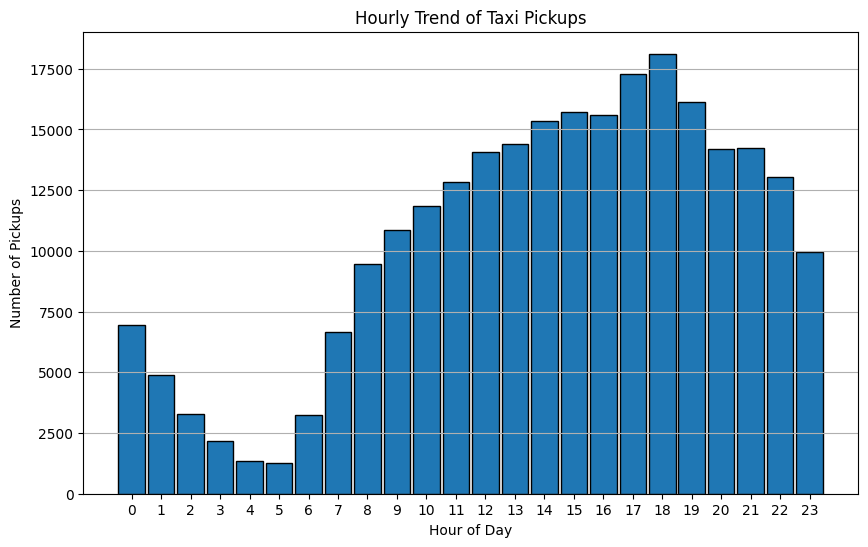

In [1336]:
# Find and show the hourly trends in taxi pickups

# When I was plotting by default, there was some alignment issues in the graph.
# Thus I took assistance from the internet to adjust the alignment. This has been continued in the remaining below sub-sections.
bins = [i - 0.5 for i in range(25)]

plt.figure(figsize=(10,6))
plt.hist(df["tpep_pickup_hour"], bins=bins, edgecolor='black', rwidth=0.9, align='mid')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trend of Taxi Pickups")
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()


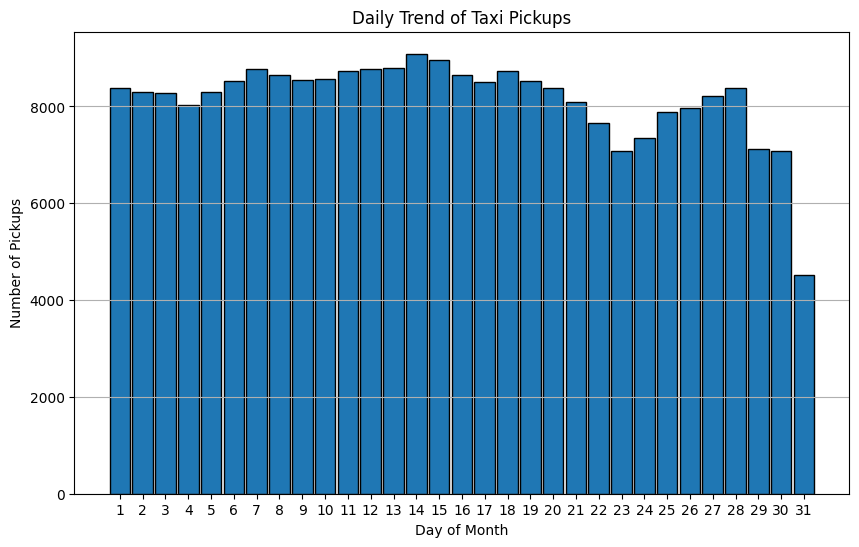

In [1338]:
# Find and show the daily trends in taxi pickups (days of the week)

bins = [i - 0.5 for i in range(1,33)]

df['tpep_pickup_day'] = df['tpep_pickup_datetime'].dt.day
plt.figure(figsize=(10,6))
plt.hist(df["tpep_pickup_day"], bins=bins, edgecolor='black', rwidth=0.9, align='mid')
plt.xlabel("Day of Month")
plt.ylabel("Number of Pickups")
plt.title("Daily Trend of Taxi Pickups")
plt.xticks(range(1,32))
plt.grid(axis='y')
plt.show()


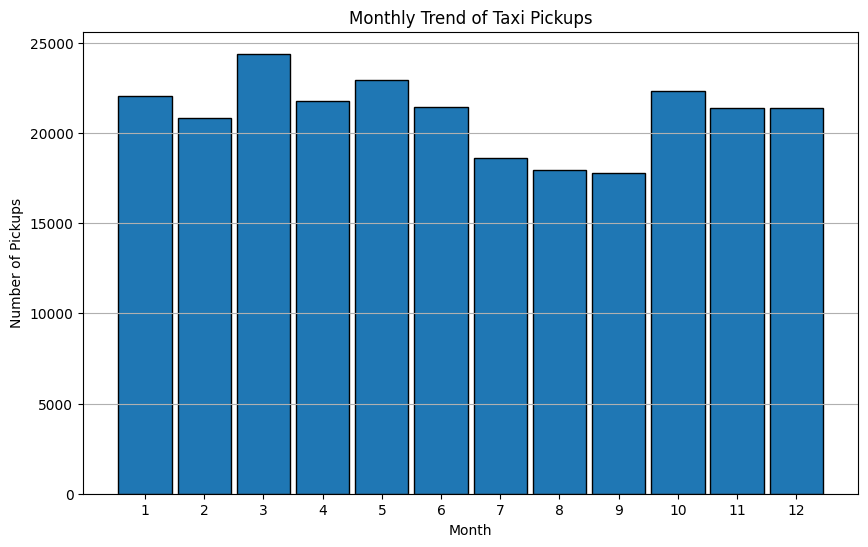

In [1340]:
# Show the monthly trends in pickups

bins = [i - 0.5 for i in range(1,14)]

df['tpep_pickup_month'] = df['tpep_pickup_datetime'].dt.month

plt.figure(figsize=(10,6))
plt.hist(df["tpep_pickup_month"], bins=bins, edgecolor='black', rwidth=0.9, align='mid')
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trend of Taxi Pickups")
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [1344]:
# Analyse the above parameters

print(df.fare_amount.value_counts())
print(df.tip_amount.value_counts())
print(df.total_amount.value_counts())
print(df.trip_distance.value_counts())

print('\n\n')
print(df.fare_amount.describe())
print(df.tip_amount.describe())
print(df.total_amount.describe())
print(df.trip_distance.describe())

# None of these contain negative values
# fare_amount doesn't contain zero values. There are some minimal values, but none zero.
# tip_amount contains zero values.
# total_amount doesn't contain zero values.  
# trip_distance contains zero values.


fare_amount
9.3      12426
10.0     12148
7.9      12118
8.6      12096
10.7     11531
         ...  
408.3        1
59.4         1
171.7        1
138.0        1
125.9        1
Name: count, Length: 666, dtype: int64
tip_amount
0.00     53952
2.00     13880
1.00     10841
3.00      7242
5.00      3448
         ...  
0.36         1
27.24        1
16.73        1
22.35        1
32.40        1
Name: count, Length: 2315, dtype: int64
total_amount
16.80     3872
12.60     3561
21.00     3320
15.96     2168
18.48     2091
          ... 
71.63        1
114.23       1
83.60        1
52.28        1
53.04        1
Name: count, Length: 6443, dtype: int64
trip_distance
0.90     3821
1.00     3725
1.10     3664
0.80     3629
1.20     3548
         ... 
29.76       1
21.12       1
24.42       1
24.40       1
31.82       1
Name: count, Length: 2603, dtype: int64



count    252832.000000
mean         17.181539
std          14.857793
min           0.010000
25%           9.300000
50%          12.800000
7

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [1348]:
# Create a df with non zero entries for the selected parameters.

df_nonzero = df[(df.fare_amount!=0) & (df.tip_amount!=0) & (df.total_amount!=0) & (df.trip_distance!=0)]
df_nonzero.shape

# It is not recommended to drop rides where tip_amount is 0.
# It is not recommended to drop rides where trip_distance is 0, since these could be trips where the customer was ferried around and dropped back to start point.
# If we are looking at dropping record where trip_distance is 0, an additional condition of duration = ~0 should also be included.


(198189, 20)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

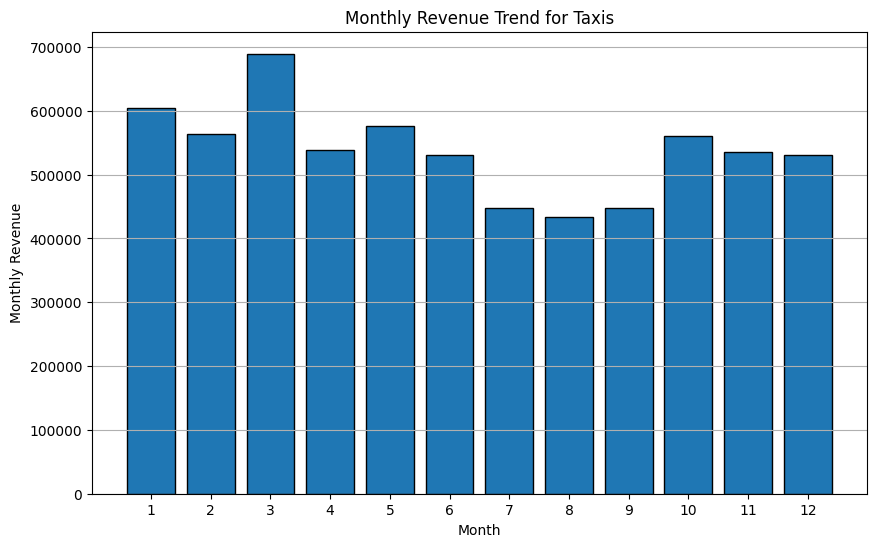

In [1351]:
# Group data by month and analyse monthly revenue

monthly_revenue = df.groupby("tpep_pickup_month")["total_amount"].sum().reset_index()
monthly_revenue = monthly_revenue.sort_values("tpep_pickup_month")

plt.figure(figsize=(10,6))
plt.bar(monthly_revenue["tpep_pickup_month"], monthly_revenue["total_amount"], edgecolor='black')
plt.xlabel("Month")
plt.ylabel("Monthly Revenue")
plt.title("Monthly Revenue Trend for Taxis")
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

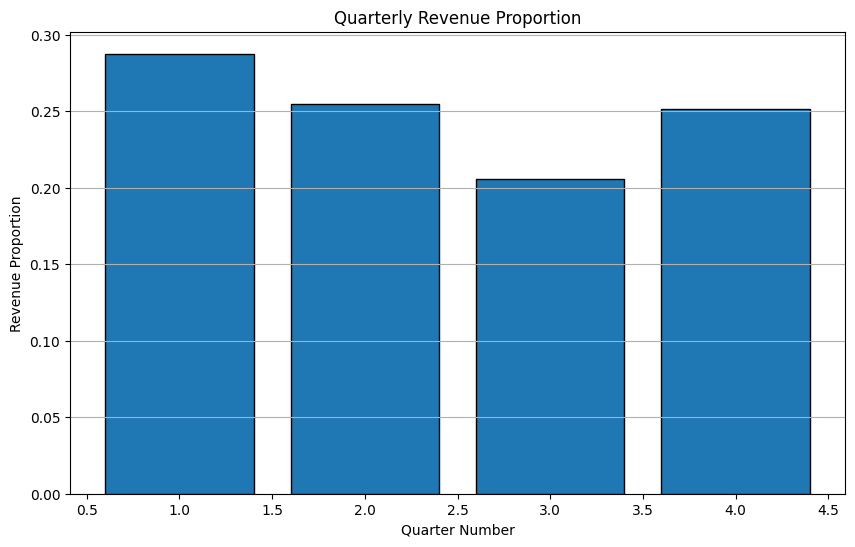

In [1354]:
# Calculate proportion of each quarter

df["tpep_pickup_quarter"] = df["tpep_pickup_datetime"].dt.quarter
quarterly_revenue = df.groupby("tpep_pickup_quarter")["total_amount"].sum().reset_index()

total_revenue = quarterly_revenue["total_amount"].sum()
quarterly_revenue["proportion"] = quarterly_revenue["total_amount"] / total_revenue


plt.figure(figsize=(10, 6))
plt.bar(quarterly_revenue["tpep_pickup_quarter"], quarterly_revenue["proportion"], edgecolor='black')
plt.ylabel("Revenue Proportion")
plt.xlabel("Quarter Number")
plt.title("Quarterly Revenue Proportion")
plt.grid(axis='y')
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

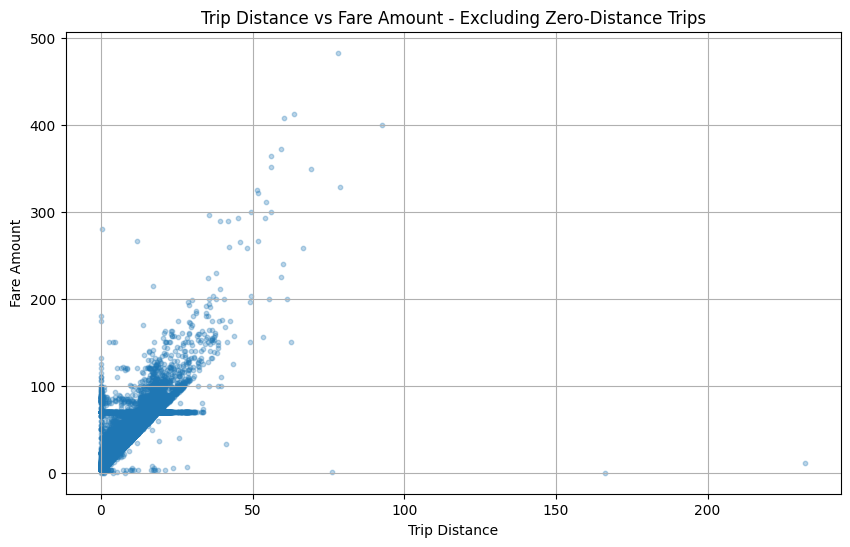

In [1357]:
# Show how trip fare is affected by distance

# Exclude records with trip_distance = 0
df = df[df["trip_distance"] > 0]

plt.figure(figsize=(10,6))
plt.scatter(df["trip_distance"], df["fare_amount"], alpha=0.3, s=10)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount - Excluding Zero-Distance Trips")
plt.grid(True)
plt.show()

# Correlations Observed:
# 1. The trip_distance and fare_amount have a linear correlation. (~y = ax + b relationship) 
# 2. We see datapints where a constant fare_amount is charged until a certain trip_distance threshold (~35). This could be a fixed fare amount charged for certain trip types upto a certain distance threshold. (Examply: Uber / Ola fixed rental.)
# 3. We also see some amount of spread of fare_amount across same distance values. This is likely depicting surge pricing during various durations. But the spread is limited.

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

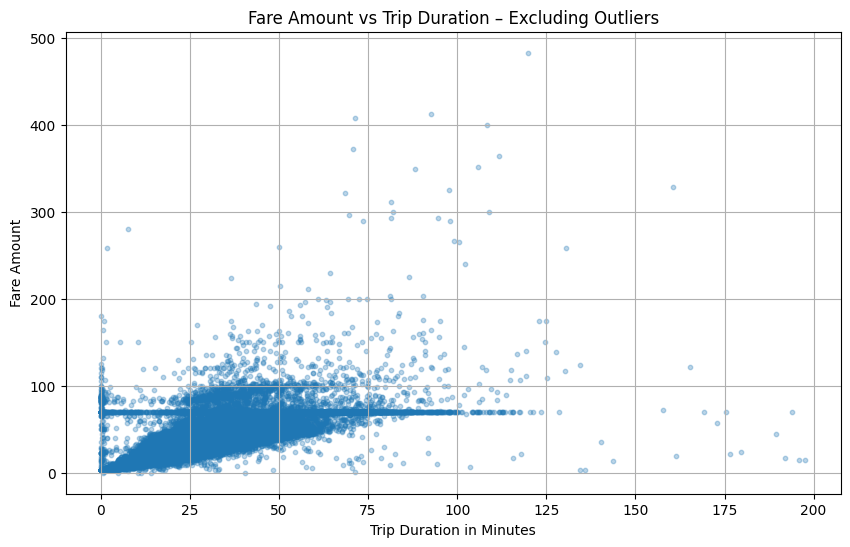

In [1360]:
# Show relationship between fare and trip duration

# Calculate trip duration.
df["trip_duration_sec"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds()
df["trip_duration_min"] = df["trip_duration_sec"]/60

# Find records with duration > 200 mins - 212
# df[df["trip_duration_min"] > 200].shape

# Filter out invalid values <= 0 and outliers > 200 mins.
df = df[(df["trip_duration_min"] > 0) & (df["trip_duration_min"] <= 200)]

# Plot a scatter plot to obtain the relationship
plt.figure(figsize=(10,6))
plt.scatter(df["trip_duration_min"], df["fare_amount"], alpha=0.3, s=10)
plt.xlabel("Trip Duration in Minutes")
plt.ylabel("Fare Amount")
plt.title("Fare Amount vs Trip Duration – Excluding Outliers")
plt.grid(True)
plt.show()

# Correlations Observed:
# 1. The trip_duration and fare_amount have a linear correlation. (~y = ax + b relationship) 
# 2. We see datapints where a constant fare_amount is charged until a certain trip_duration threshold (~35). This could be a fixed fare amount charged for certain trip types upto a certain duration threshold. (Examply: Uber / Ola fixed rental.)
# 3. We also see a fair amount of spread of fare_amount across same duration values. This is likely depicting surge pricing during various durations.


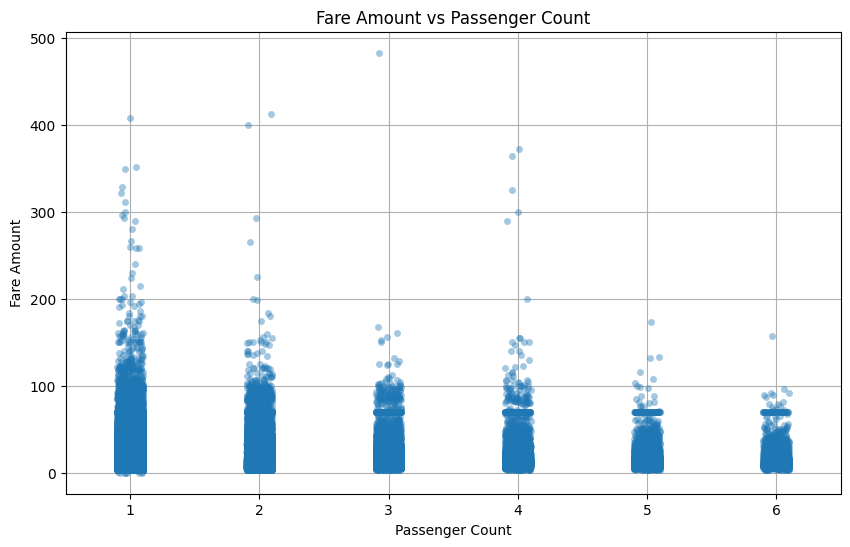

                 fare_amount  passenger_count
fare_amount         1.000000         0.041584
passenger_count     0.041584         1.000000 

passenger_count
1    193214
2     37397
3      9474
4      5095
5      3352
6      2242
Name: count, dtype: int64


In [1362]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10,6))
sns.stripplot(x="passenger_count", y="fare_amount", data=df, alpha=0.4)
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount")
plt.title("Fare Amount vs Passenger Count")
plt.grid(True)
plt.show()

print(df[["fare_amount", "passenger_count"]].corr(),'\n')
print(df.passenger_count.value_counts())

# As per the plot, there is minimal correlation between fare_amount and passenger_count. They almost seem independent.
# However, an important point to note is that most of the data is skewed towards 1 or 2 passenger trips.
# Thus it could be possible we have insufficient data points to arrive at conclusions.


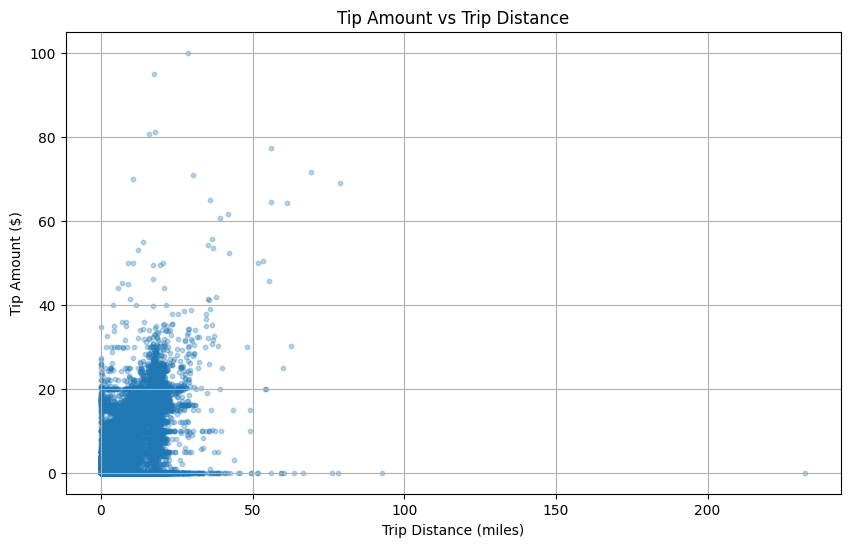

In [1363]:
# Show relationship between tip and trip distance
# Tip amount has already been cleaned in the previous section.

plt.figure(figsize=(10,6))
plt.scatter(df["trip_distance"], df["tip_amount"], alpha=0.3, s=10)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.title("Tip Amount vs Trip Distance")
plt.grid(True)
plt.show()

# We see tip amounts clustering around short distance rides.
# It is likely that long distance rides in itself cost more money which results in poor tipping.


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

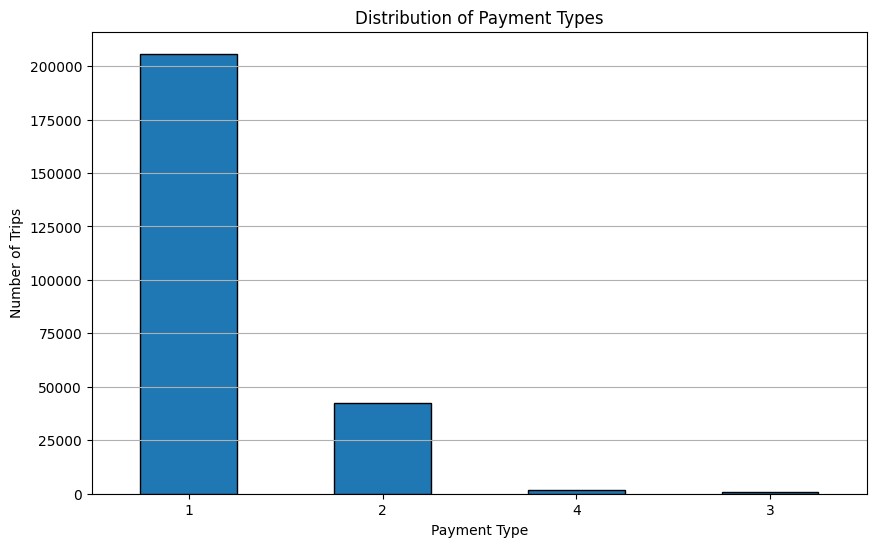

In [1367]:
# Analyse the distribution of different payment types (payment_type).

payment_counts = df["payment_type"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
payment_counts.plot(kind='bar', edgecolor='black')
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# We see that most of the trips are paid via credit card.
# Cash comes in as a modest second.


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [1373]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [1375]:
# import geopandas as gpd
import geopandas as gpd 

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [1379]:
print(zones.info())
zones.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [1383]:
# Merge zones and trip records using locationID and PULocationID

merged = df.merge(zones, how="left", left_on="PULocationID", right_on="LocationID")
merged.head()
#print(merged.columns)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tpep_pickup_quarter,trip_duration_sec,trip_duration_min,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:47:18,2023-01-01 01:12:29,1,3.88,1,148,246,1,25.4,...,1,1511.0,25.183333,148.0,0.039131,0.000070,Lower East Side,148.0,Manhattan,"POLYGON ((988552.836 201677.665, 988387.669 20..."
1,2,2023-01-01 00:49:43,2023-01-01 01:06:26,4,1.16,1,164,186,1,14.9,...,1,1003.0,16.716667,164.0,0.035772,0.000056,Midtown South,164.0,Manhattan,"POLYGON ((988787.425 210315.593, 988662.868 21..."
2,2,2023-01-01 00:14:50,2023-01-01 00:25:52,1,0.87,1,170,233,1,10.7,...,1,662.0,11.033333,170.0,0.045769,0.000074,Murray Hill,170.0,Manhattan,"POLYGON ((991999.299 210994.739, 991972.635 21..."
3,2,2023-01-01 00:51:08,2023-01-01 00:56:01,1,0.89,1,263,140,1,7.2,...,1,293.0,4.883333,263.0,0.037017,0.000066,Yorkville West,263.0,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22..."
4,1,2023-01-01 00:39:33,2023-01-01 00:46:19,3,1.30,1,193,145,2,8.6,...,1,406.0,6.766667,193.0,0.065530,0.000146,Queensbridge/Ravenswood,193.0,Queens,"POLYGON ((1002191.529 219642.382, 1002040.928 ..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [1386]:
# Group data by location and calculate the number of trips
pickup_counts = df.groupby("PULocationID",observed=True).size().reset_index(name="trip_count").sort_values("trip_count", ascending=False)
print(pickup_counts)

    PULocationID  trip_count
179          237       12992
117          161       12839
178          236       11376
118          162        9815
135          186        9576
..           ...         ...
155          210           1
157          212           1
158          213           1
164          221           1
141          192           1

[203 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [1389]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(pickup_counts, left_on="LocationID", right_on="PULocationID", how="left")
zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1,11.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN,NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",NaN,NaN
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4,298.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN,NaN


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

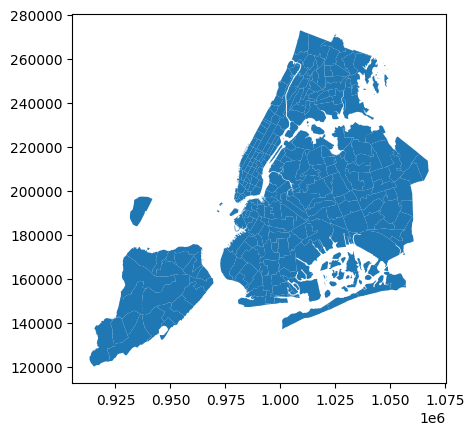

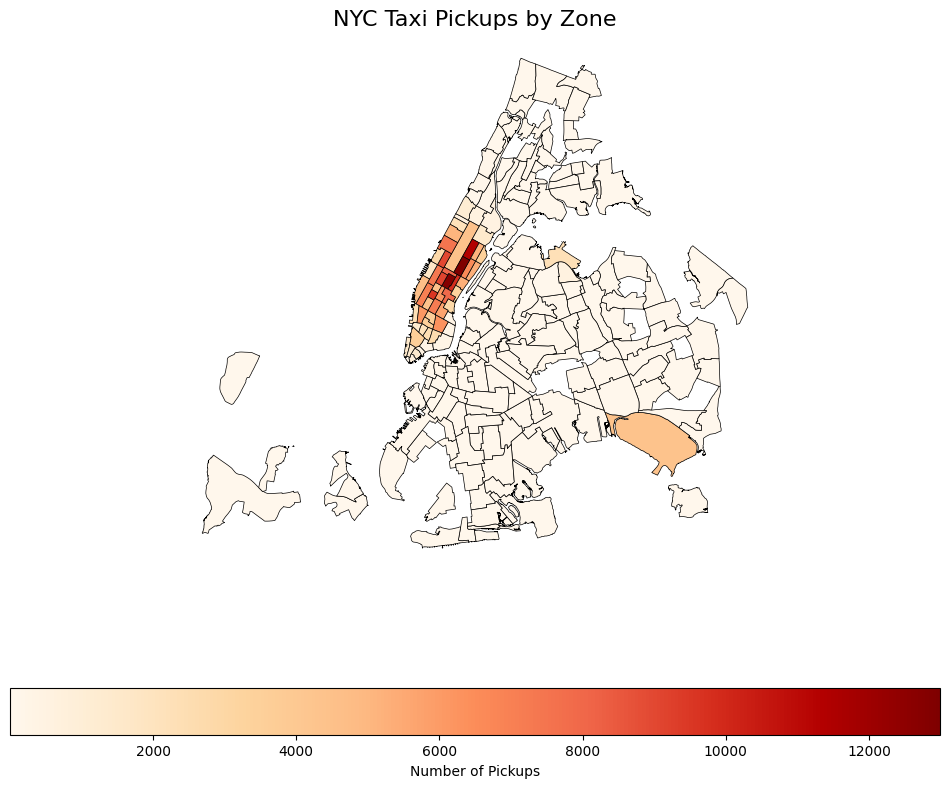

In [1393]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(
    column="trip_count",            # column to color by
    ax=ax,                          # use the custom axis
    legend=True,                    # show color legend
    legend_kwds={
        "label": "Number of Pickups",
        "orientation": "horizontal"  # or "vertical"
    },
    cmap="OrRd",                    # color map
    edgecolor="black",              # boundary color
    linewidth=0.5
)

ax.set_title("NYC Taxi Pickups by Zone", fontsize=16)
ax.axis("off")  # optional: remove axes for a cleaner map

plt.show()


In [1395]:
# can you try displaying the zones DF sorted by the number of trips?

zones.sort_values(by="trip_count", ascending=False).head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237,12992.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161,12839.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236,11376.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162,9815.0
185,186,0.024696,0.000037,Penn Station/Madison Sq West,186,Manhattan,"POLYGON ((986752.603 210853.699, 986627.863 21...",186,9576.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


In [1399]:

#Summary of Findings:
#1. The busiest hours of the day were 17:00, 18:00, 19:00.

#2. There was a sharp fall in daily demand between 00:00 to 08:00.

#3. The daily demand was more or less evenly distributed. The decline in demand on 31 should be ignored as only some months have 31 days. Hence the anomaly.

#4. The monthly demand was more or less evenly distributed with March being the month with highest demand and September with the lowest demand. There was a slight decline in demand seen in July, August and September. It recovered again in October.

#5. The monthly revenue more or less aligns with the monthly demand trend. March had the highest revenue and there was a decline observed in July, August and September.

#6. The quarterly revenue again aligns with the monthly trend. There was a decline in revenue observed in Q3 compared to the other quarters which correlates with the decline in demand.

#7. Trip Distance vs Fare Amount - Correlations Observed:
#7a. The trip_distance and fare_amount have a linear correlation. (~y = ax + b relationship) 
#7b. We see datapints where a constant fare_amount is charged until a certain trip_distance threshold (~35). This could be a fixed fare amount charged for certain trip types upto a certain distance threshold. (Examply: Uber / Ola fixed rental.)
#7c. We also see some amount of spread of fare_amount across same distance values. This is likely depicting surge pricing during various durations. But the spread is limited.

#8. Fare Amount vs Trip Duration Correlations Observed:
#8a. The trip_duration and fare_amount have a linear correlation. (~y = ax + b relationship) 
#8b. We see datapints where a constant fare_amount is charged until a certain trip_duration threshold (~35). This could be a fixed fare amount charged for certain trip types upto a certain duration threshold. (Examply: Uber / Ola fixed rental.)
#8c. We also see a fair amount of spread of fare_amount across same duration values. This is likely depicting surge pricing during various durations.

#9. There was minimal correlation between fare_amount and passenger_count. They almost seem independent. However, an important point to note is that most of the data is skewed towards 1 or 2 passenger trips. Thus it could be possible we have insufficient data points to arrive at conclusions.

#10. We saw tip amounts clustering around short distance rides. It is likely that long distance rides in itself cost more money which may result in poor tipping.

#11. We saw that most of the trips are paid via credit card. Cash came in as a modest second.

#12. We saw that the trip_counts were clustered around a small section of the city. The top 5 zones had PULocationID 237, 161, 236, 162, 186. Thus the highest demand is centred around a very small portion of the city. These could likely be the business and/or commercial sections. 
 


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [1407]:
# Find routes which have the slowest speeds at different times of the day
# The merged dataframe is called 'merged'. Hence we will continue the analysis using this 'merged' dataframe.

# merged.columns
#Calculating speed in miles per hour
merged['speed'] = merged.trip_distance/(merged.trip_duration_sec/3600)
merged = merged.sort_values("speed", ascending=True)
merged.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,trip_duration_sec,trip_duration_min,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,speed
248124,2,2023-12-26 17:45:58,2023-12-26 18:53:02,1,0.02,2,143,143,2,70.0,...,4024.0,67.066667,143.0,0.054180,0.000151,Lincoln Square West,143.0,Manhattan,"POLYGON ((989338.1 223572.253, 989368.225 2235...",0.017893
203605,2,2023-10-25 15:35:29,2023-10-25 15:59:58,1,0.01,1,234,231,1,21.2,...,1469.0,24.483333,234.0,0.036072,0.000073,Union Sq,234.0,Manhattan,"POLYGON ((987029.847 207022.299, 987048.27 206...",0.024506
195069,2,2023-10-13 19:35:56,2023-10-13 20:00:03,2,0.01,1,239,161,1,20.5,...,1447.0,24.116667,239.0,0.063626,0.000205,Upper West Side South,239.0,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22...",0.024879
242371,2,2023-12-16 23:42:50,2023-12-17 01:58:40,1,0.06,1,170,129,2,3.7,...,8150.0,135.833333,170.0,0.045769,0.000074,Murray Hill,170.0,Manhattan,"POLYGON ((991999.299 210994.739, 991972.635 21...",0.026503
188496,2,2023-10-04 15:27:28,2023-10-04 16:02:04,1,0.02,1,163,127,2,39.4,...,2076.0,34.600000,163.0,0.034177,0.000041,Midtown North,163.0,Manhattan,"POLYGON ((989412.663 219020.943, 990045.841 21...",0.034682


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

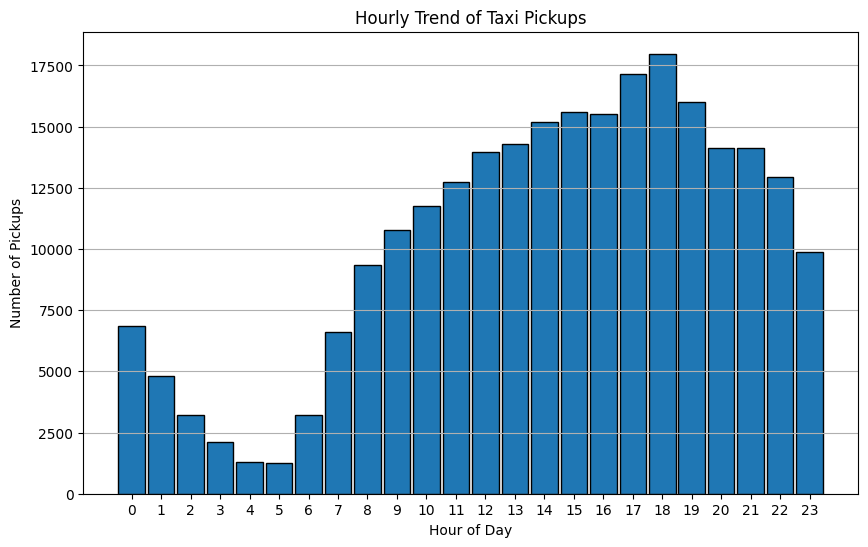

Busiest Hour:  18
Trip Count for Busiest Hour:  17977


In [1411]:
# Visualise the number of trips per hour and find the busiest hour
# Already done in 3.1.2

bins = [i - 0.5 for i in range(25)]

plt.figure(figsize=(10,6))
plt.hist(df["tpep_pickup_hour"], bins=bins, edgecolor='black', rwidth=0.9, align='mid')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trend of Taxi Pickups")
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()

hour_counts = df["tpep_pickup_hour"].value_counts()
busiest_hour = hour_counts.idxmax()
trip_count = hour_counts.max()
print("Busiest Hour: ",busiest_hour)
print("Trip Count for Busiest Hour: ",trip_count)



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [1415]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
sampled_size = 1896399 # length of merged and sampled df. (frac was 0.05). Per instruction, this was further downsampled by 0.15 to ensure count is within 300k.
original_size = sampled_size / 0.05 # Thus the original count of the 12 parquet files is being approximated through this step.

sample_fraction = len(merged) / original_size
print(len(merged))
hourly_trip_counts = merged["tpep_pickup_hour"].value_counts().sort_values(ascending=False)
top_5_hours = hourly_trip_counts.head(5)
actual_counts = (top_5_hours / sample_fraction).round(0).astype(int)

print(actual_counts)

250777
tpep_pickup_hour
18    2719026
17    2595159
19    2421685
15    2357861
16    2344854
Name: count, dtype: int32


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

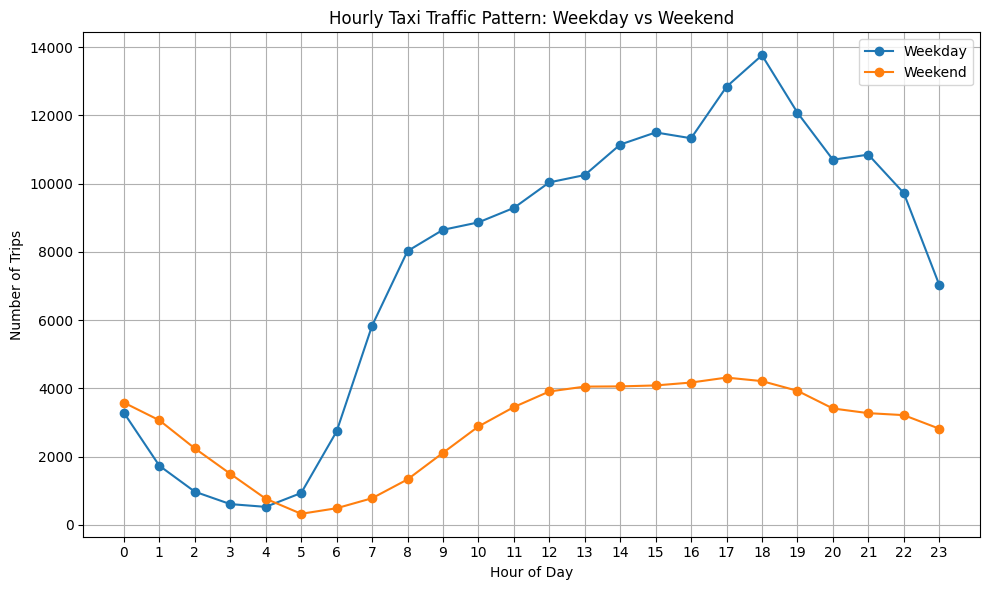

In [1418]:
# Compare traffic trends for the week days and weekends

merged_weekday = merged[merged['tpep_pickup_datetime'].dt.dayofweek < 5]
weekday_hourly = merged_weekday['tpep_pickup_hour'].value_counts().sort_index()

merged_weekend = merged[merged['tpep_pickup_datetime'].dt.dayofweek >= 5]
weekend_hourly = merged_weekend['tpep_pickup_hour'].value_counts().sort_index()

plt.figure(figsize=(10,6))

plt.plot(weekday_hourly.index, weekday_hourly.values, label="Weekday", marker='o')
plt.plot(weekend_hourly.index, weekend_hourly.values, label="Weekend", marker='o')

plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Taxi Traffic Pattern: Weekday vs Weekend")
plt.xticks(range(24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [1421]:
#Inferences:
#1. The busiest hours during weekdays were 17:00, 18:00, 19:00.
#2. There was a significant spike in demand starting from noon till late evening on weekdays.
#3. The demand on weekends remains more or less equaly spread out across the greater part of the day. There is a dip between 02:00 and 09:00 but otherwise it is almost evenly distributed.
#4. There was slightly greater demand during the 00:00 to 04:00 duration on weekends compared to weekdays. 
#5. Finding the above demand patterns can help with optimized deployment of cabs across various timeslots and across weekdays & weekends.


**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

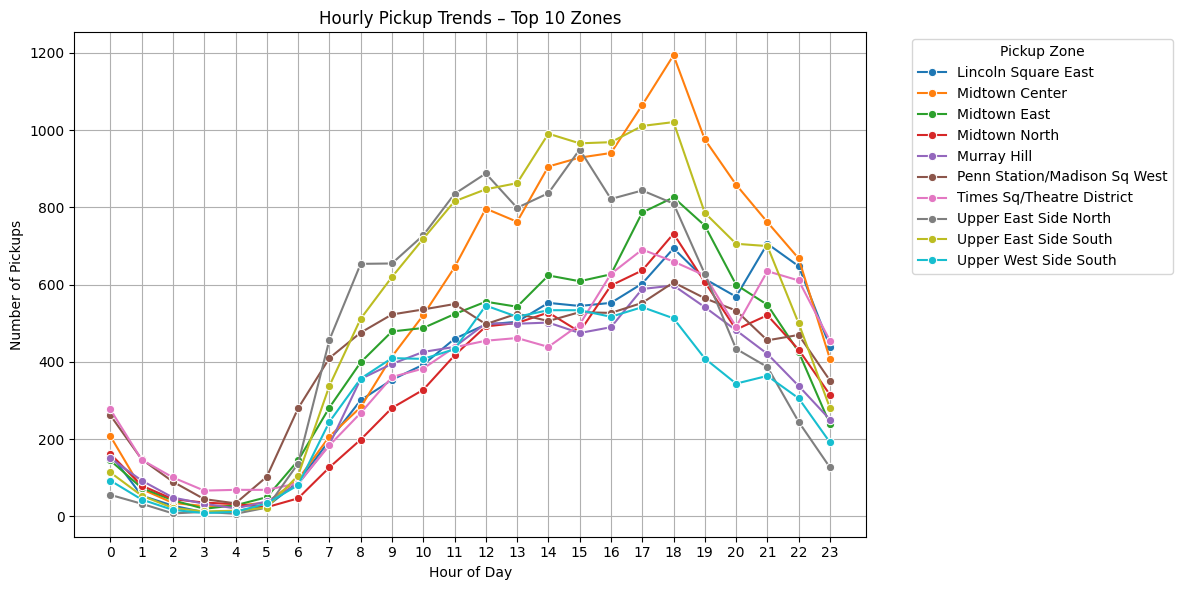

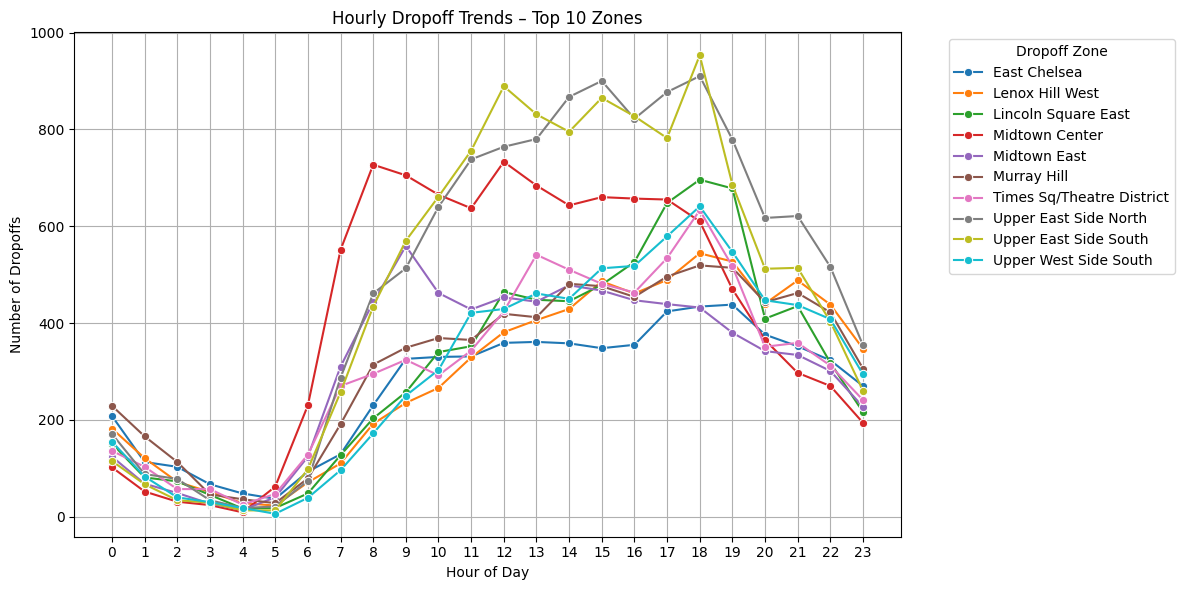

In [1424]:
# Find top 10 pickup and dropoff zones
# print(merged.columns)
# print(merged.head())

merged['tpep_dropoff_hour'] = merged['tpep_dropoff_datetime'].dt.hour

# Get the zone attributes for the Dropoff columns using merge operation.
merged = merged.merge(zones[['LocationID', 'zone', 'borough']], left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('', '_DO'))
#print(merged.columns)
#print(merged.shape)

# STEP 1: Count hourly pickups per zone
pickup_zone_hourly = merged.groupby(['zone', 'tpep_pickup_hour']).size().reset_index(name='pickup_count')
pickup_zone_hourly.shape

top_pickup_zones = (
    pickup_zone_hourly.groupby('zone')['pickup_count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# STEP 3: Filter for top pickup zones only
pickup_trends = pickup_zone_hourly[pickup_zone_hourly['zone'].isin(top_pickup_zones)]

# STEP 4: Plot pickup trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=pickup_trends, x='tpep_pickup_hour', y='pickup_count', hue='zone', marker='o')
plt.title("Hourly Pickup Trends – Top 10 Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(24))
plt.grid(True)
plt.legend(title='Pickup Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# STEP 5: Hourly dropoffs per zone
dropoff_zone_hourly = merged.groupby(['zone_DO', 'tpep_dropoff_hour']).size().reset_index(name='dropoff_count')
dropoff_zone_hourly = dropoff_zone_hourly.rename(columns={"zone_DO": "zone"})

# STEP 6: Top 10 dropoff zones
top_dropoff_zones = (
    dropoff_zone_hourly.groupby('zone')['dropoff_count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# STEP 7: Filter for top dropoff zones only
dropoff_trends = dropoff_zone_hourly[dropoff_zone_hourly['zone'].isin(top_dropoff_zones)]

# STEP 8: Plot dropoff trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=dropoff_trends, x='tpep_dropoff_hour', y='dropoff_count', hue='zone', marker='o')
plt.title("Hourly Dropoff Trends – Top 10 Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Dropoffs")
plt.xticks(range(24))
plt.grid(True)
plt.legend(title='Dropoff Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [1427]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

#merged1 = merged

# Step 1: Count total pickups per zone
pickup_counts = merged['zone'].value_counts().reset_index()
pickup_counts.columns = ['zone', 'pickup_count']

# Step 2: Count total dropoffs per zone
dropoff_counts = merged['zone_DO'].value_counts().reset_index()
dropoff_counts.columns = ['zone', 'dropoff_count']

# Step 3: Merge both & remove dropoff_counts = 0 entries
zone_ratios = pickup_counts.merge(dropoff_counts, on='zone', how='outer').fillna(0)

zone_ratios = zone_ratios[zone_ratios['dropoff_count']>0]

# Step 4: Calculate ratio
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickup_count'] / (zone_ratios['dropoff_count'] + 1e-6)

# Step 5: Top & bottom 10 by ratio
top_10 = zone_ratios.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
bottom_10 = zone_ratios.sort_values('pickup_dropoff_ratio', ascending=True).head(10)

print("Top 10 Zones as per ratio")
print(top_10)

print("Bottom 10 Zones as per ratio")
print(bottom_10)

Top 10 Zones as per ratio
                             zone  pickup_count  dropoff_count  \
65                  East Elmhurst         572.0           69.0   
118                   JFK Airport        4415.0         2545.0   
175  Penn Station/Madison Sq West        9577.0         5794.0   
239                 Willets Point           3.0            2.0   
103       Greenwich Village South        3571.0         2442.0   
40                   Central Park        4459.0         3227.0   
236                  West Village        6098.0         4500.0   
151                  Midtown East        9815.0         7392.0   
150                Midtown Center       12839.0        10033.0   
152                 Midtown North        8103.0         6362.0   

     pickup_dropoff_ratio  
65               8.289855  
118              1.734774  
175              1.652917  
239              1.499999  
103              1.462326  
40               1.381779  
236              1.355111  
151              1.3277

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [1430]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_pickups = merged[(merged['tpep_pickup_hour'] >= 23) | (merged['tpep_pickup_hour'] <= 5)]
night_dropoffs = merged[(merged['tpep_dropoff_hour'] >= 23) | (merged['tpep_dropoff_hour'] <= 5)]

night_pickup_counts = night_pickups['zone'].value_counts().reset_index()
night_pickup_counts.columns = ['zone', 'night_pickup_count']

night_dropoff_counts = night_dropoffs['zone_DO'].value_counts().reset_index()
night_dropoff_counts.columns = ['zone', 'night_dropoff_count']

night_zone_traffic = night_pickup_counts.merge(night_dropoff_counts, on='zone', how='outer').fillna(0)

# Add total night traffic column
night_zone_traffic['total_night_trips'] = night_zone_traffic['night_pickup_count'] + night_zone_traffic['night_dropoff_count']

top_night_zones = night_zone_traffic.sort_values('total_night_trips', ascending=False).head(10)
print(top_night_zones[['zone', 'night_pickup_count', 'night_dropoff_count', 'total_night_trips']])


                             zone  night_pickup_count  night_dropoff_count  \
70                   East Village              2267.0               1248.0   
223                  West Village              1935.0                811.0   
40                   Clinton East              1502.0               1074.0   
130               Lower East Side              1378.0                685.0   
205     Times Sq/Theatre District              1185.0                666.0   
59                   East Chelsea               853.0                846.0   
96        Greenwich Village South              1307.0                386.0   
92                       Gramercy               795.0                852.0   
166  Penn Station/Madison Sq West              1034.0                590.0   
145                 Midtown South               948.0                645.0   

     total_night_trips  
70              3515.0  
223             2746.0  
40              2576.0  
130             2063.0  
205             

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

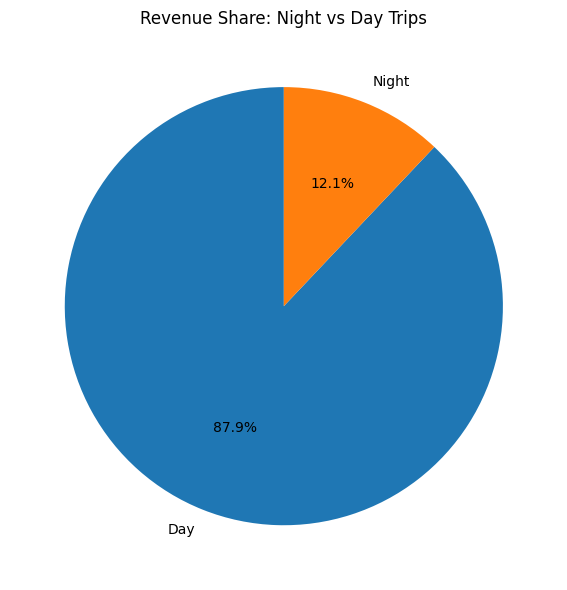

In [1433]:
# Filter for night hours (11 PM to 5 AM)

merged['time_period'] = merged['tpep_pickup_hour'].apply(lambda x: 'Night' if (x >= 23) or (x <= 5) else 'Day')

revenue_by_period = merged.groupby('time_period')['total_amount'].sum().reset_index()
revenue_by_period.columns = ['Time Period', 'Total Revenue']

# Calculate percentage share
total_revenue = revenue_by_period['Total Revenue'].sum()
revenue_by_period['Share (%)'] = (revenue_by_period['Total Revenue'] / total_revenue) * 100

plt.figure(figsize=(6,6))
plt.pie(revenue_by_period['Total Revenue'], labels=revenue_by_period['Time Period'],
        autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
plt.title("Revenue Share: Night vs Day Trips")
plt.tight_layout()
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

   passenger_count   count       mean    median       min      max
0                1  193245  11.083145  7.380952  0.001250  10000.0
1                2   37403   6.359901  3.622754  0.085714   4262.5
2                3    9474   4.966610  2.434457  0.824499   4403.0
3                4    5095   4.189882  1.828512  0.365854   2500.0
4                5    3352   1.614080  1.439745  0.467914     74.0
5                6    2242   1.402224  1.225648  0.415036     50.0


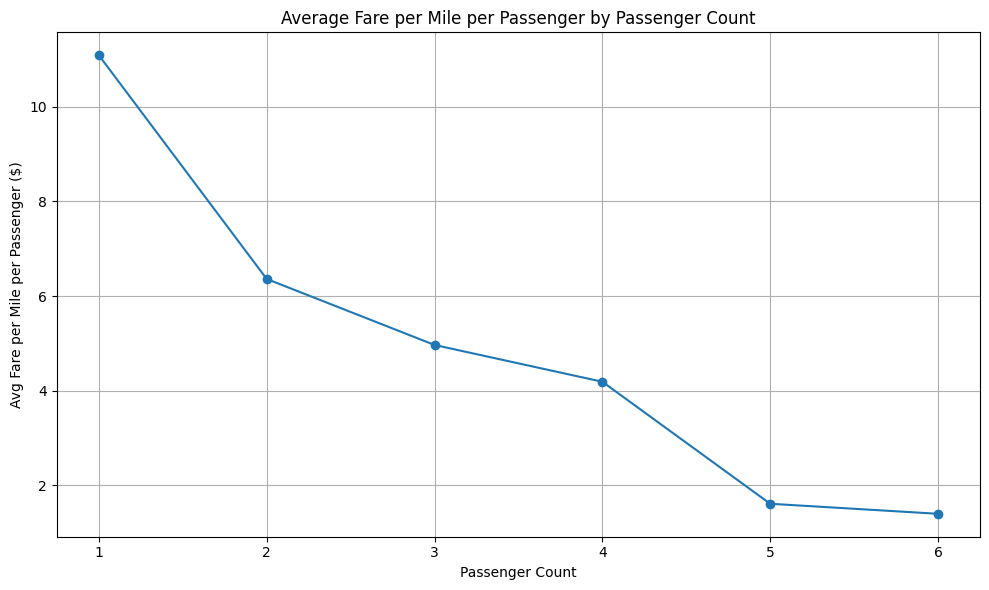

In [1437]:
# Analyse the fare per mile per passenger for different passenger counts

merged['fare_per_mile_per_passenger'] = merged['fare_amount'] / (merged['trip_distance'] * merged['passenger_count'])

fare_analysis = (
    merged.groupby('passenger_count')['fare_per_mile_per_passenger']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .reset_index()
)

fare_analysis = fare_analysis.sort_values(by='passenger_count')
print(fare_analysis)

plt.figure(figsize=(10,6))
plt.plot(fare_analysis['passenger_count'], fare_analysis['mean'], marker='o')
plt.title("Average Fare per Mile per Passenger by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Avg Fare per Mile per Passenger ($)")
plt.grid(True)
plt.xticks(fare_analysis['passenger_count'])
plt.tight_layout()
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

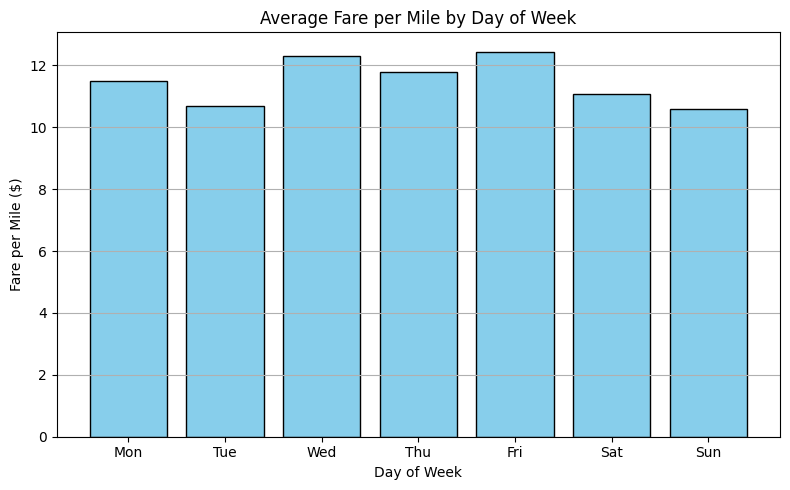

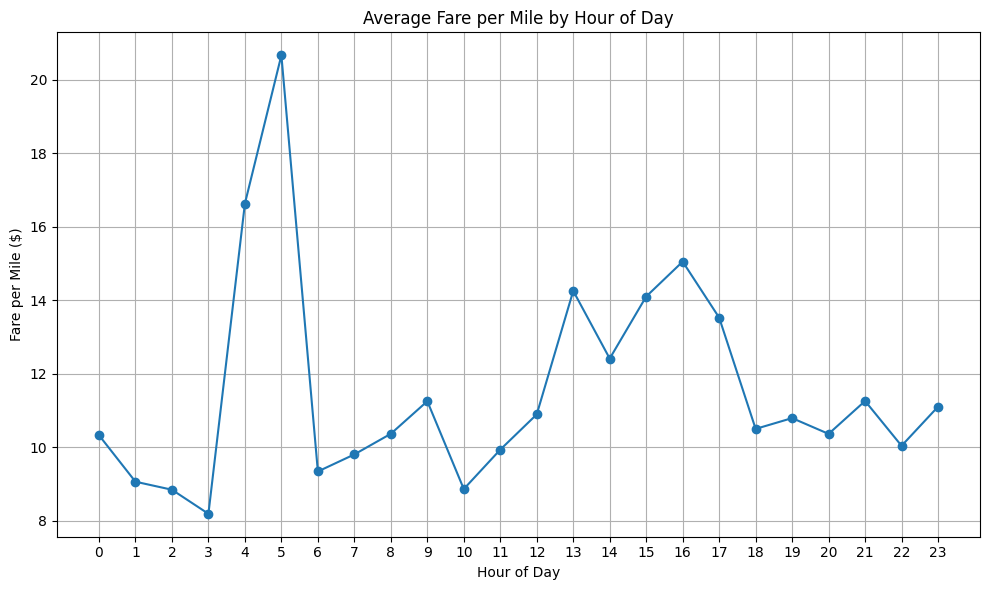

In [1440]:
# Compare the average fare per mile for different days and for different times of the day

#merged1 = merged

merged['day_of_week'] = merged['tpep_pickup_datetime'].dt.dayofweek
merged['fare_per_mile'] = merged['fare_amount'] / merged['trip_distance']

hourly_fare = merged.groupby('tpep_pickup_hour')['fare_per_mile'].mean().reset_index()

daily_fare = merged.groupby('day_of_week')['fare_per_mile'].mean().reset_index()
daily_fare['day_name'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(8,5))
plt.bar(daily_fare['day_name'], daily_fare['fare_per_mile'], color='skyblue', edgecolor='black')
plt.title("Average Fare per Mile by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Fare per Mile ($)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(hourly_fare['tpep_pickup_hour'], hourly_fare['fare_per_mile'], marker='o')
plt.title("Average Fare per Mile by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fare per Mile ($)")
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

   VendorID   count       mean    median       min      max
0         1   65131   8.284081  7.250000  0.001250    870.0
1         2  185680  12.658531  7.377049  0.014596  13209.0


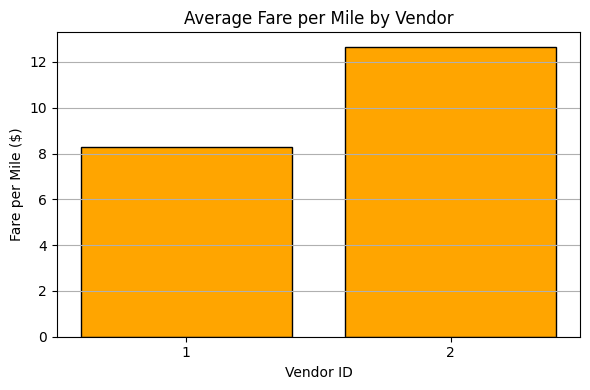

In [1443]:
# Compare fare per mile for different vendors

vendor_fare = merged.groupby('VendorID')['fare_per_mile'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
print(vendor_fare)

plt.figure(figsize=(6,4))
plt.bar(vendor_fare['VendorID'].astype(str), vendor_fare['mean'], color='orange', edgecolor='black')
plt.title("Average Fare per Mile by Vendor")
plt.xlabel("Vendor ID")
plt.ylabel("Fare per Mile ($)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


   VendorID distance_tier   count       mean    median       min           max
0         1     0–2 miles   40417   9.749614  8.500000  0.010000    870.000000
3         2     0–2 miles  109023  17.327038  8.586957  2.272727  13209.000000
1         1     2–5 miles   17884   6.381831  6.095238  0.002439     34.000000
4         2     2–5 miles   54409   6.573078  6.274510  1.463415     58.593750
2         1      >5 miles    6830   4.592635  4.435484  0.001250     15.454545
5         2      >5 miles   22248   4.663604  4.497338  0.014596     21.937843


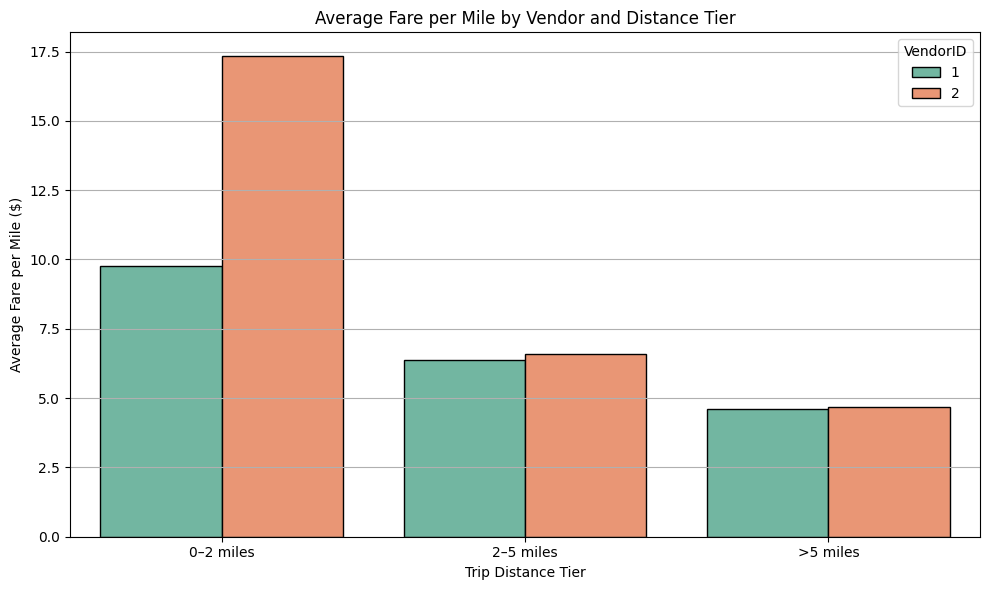

In [1446]:
# Defining distance tiers

def distance_categories(d):
    if d <= 2:
        return '0–2 miles'
    elif d <= 5:
        return '2–5 miles'
    else:
        return '>5 miles'

merged['distance_tier'] = merged['trip_distance'].apply(distance_categories)

tiered_vendor_fare = (
    merged.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .reset_index()
    .sort_values(by=['distance_tier', 'VendorID'])
)

print(tiered_vendor_fare)

plt.figure(figsize=(10,6))
sns.barplot(
    data=tiered_vendor_fare,
    x='distance_tier',
    y='mean',
    hue='VendorID',
    palette='Set2',
    edgecolor='black'
)

plt.title("Average Fare per Mile by Vendor and Distance Tier")
plt.xlabel("Trip Distance Tier")
plt.ylabel("Average Fare per Mile ($)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [1450]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

merged['tip_percent'] = (merged['tip_amount'] / merged['fare_amount']) * 100

tip_by_distance = (
    merged.groupby('distance_tier')['tip_percent']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .reset_index()
    .sort_values('distance_tier')
)
print("Tip % by Distance Bucket:")
print(tip_by_distance)


tip_by_passenger = (
    merged.groupby('passenger_count')['tip_percent']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .reset_index()
)
print("\nTip % by Passenger Count:")
print(tip_by_passenger)

tip_by_hour = (
    merged.groupby('tpep_pickup_hour')['tip_percent']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .reset_index()
)
print("\nTip % by Pickup Hour:")
print(tip_by_hour)


# As observed earlier, trip_distance and tip_amount/percent have a inverse relationship. 
# Additionally, the tip_amount/percent tends to drop during the early morning hours. This is the same duration where the fare_per_mile is very high.
# Thus it looks like the tip_amount and the fare_amount may have an inverse relationship. 


Tip % by Distance Bucket:
  distance_tier   count       mean     median  min         max
0     0–2 miles  149440  22.324150  26.611570  0.0  148.148148
1     2–5 miles   72293  18.775981  23.652968  0.0  148.148148
2      >5 miles   29078  16.835795  22.030457  0.0  138.801262

Tip % by Passenger Count:
   passenger_count   count       mean     median  min         max
0                1  193245  20.929899  24.519774  0.0  148.148148
1                2   37403  20.030278  24.040404  0.0  148.148148
2                3    9474  19.251748  23.652968  0.0  147.058824
3                4    5095  17.677867  22.807018  0.0  140.845070
4                5    3352  21.090044  24.519774  0.0  141.242938
5                6    2242  20.561949  24.048583  0.0   98.039216

Tip % by Pickup Hour:
    tpep_pickup_hour  count       mean     median  min         max
0                  0   6875  20.800736  24.556962  0.0  140.845070
1                  1   4802  20.687383  24.424779  0.0  138.888889
2        

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [1453]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tips = merged[merged['tip_percent'] < 10]
high_tips = merged[merged['tip_percent'] > 25]

summary = pd.DataFrame({
    'Metric': ['Average Fare', 'Average Distance', 'Average Tip %', 'Average Passenger Count'],
    'Low Tip (<10%)': [
        low_tips['fare_amount'].mean(),
        low_tips['trip_distance'].mean(),
        low_tips['tip_percent'].mean(),
        low_tips['passenger_count'].mean()
    ],
    'High Tip (>25%)': [
        high_tips['fare_amount'].mean(),
        high_tips['trip_distance'].mean(),
        high_tips['tip_percent'].mean(),
        high_tips['passenger_count'].mean()
    ]
})

print(summary)



                    Metric  Low Tip (<10%)  High Tip (>25%)
0             Average Fare       18.277672        13.114482
1         Average Distance        2.998964         1.957985
2            Average Tip %        1.110165        31.907881
3  Average Passenger Count        1.431531         1.363864


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

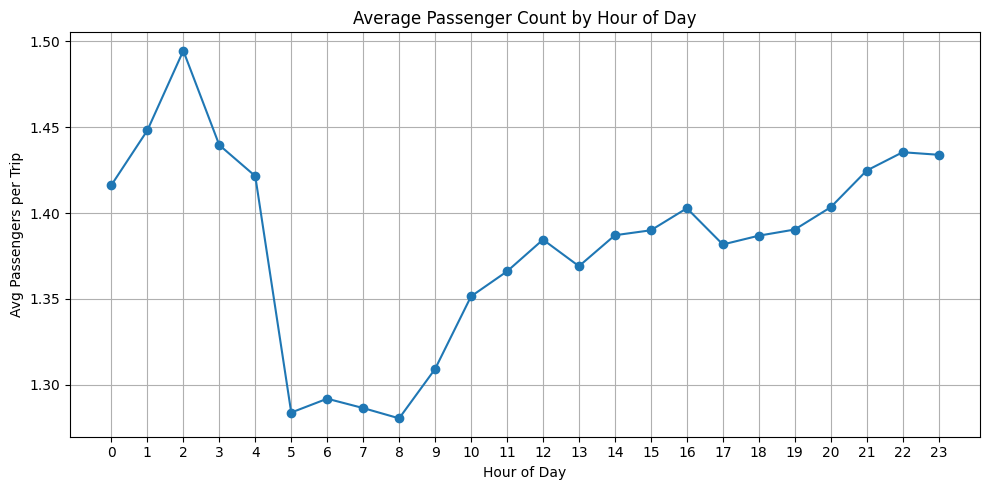

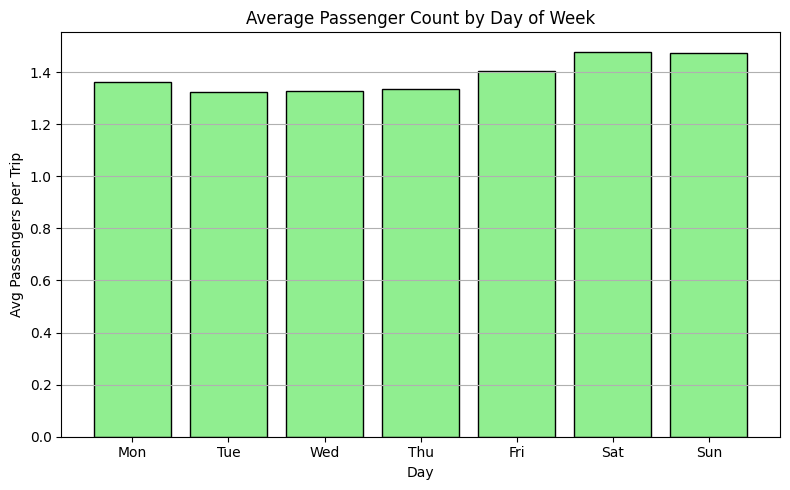

In [1456]:
# See how passenger count varies across hours and days

hourly_passenger_avg = (
    merged.groupby('tpep_pickup_hour')['passenger_count']
    .mean()
    .reset_index()
)

daily_passenger_avg = (
    merged.groupby('day_of_week')['passenger_count']
    .mean()
    .reset_index()
)
daily_passenger_avg['day_name'] = daily_passenger_avg['day_of_week'].map({
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
})

plt.figure(figsize=(10,5))
plt.plot(hourly_passenger_avg['tpep_pickup_hour'], hourly_passenger_avg['passenger_count'], marker='o')
plt.title("Average Passenger Count by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Passengers per Trip")
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.bar(daily_passenger_avg['day_name'], daily_passenger_avg['passenger_count'], color='lightgreen', edgecolor='black')
plt.title("Average Passenger Count by Day of Week")
plt.xlabel("Day")
plt.ylabel("Avg Passengers per Trip")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

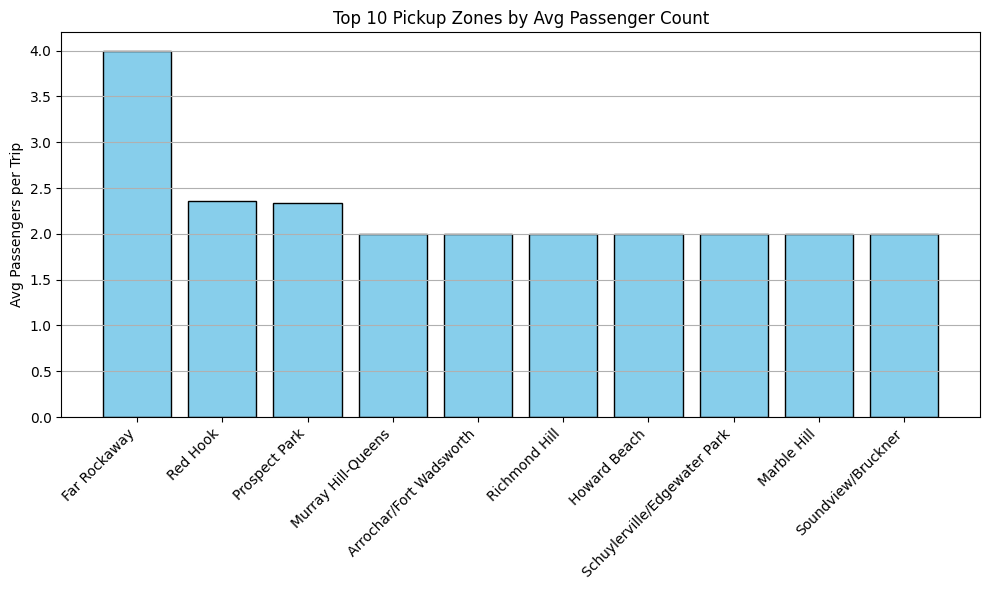

In [1459]:
# How does passenger count vary across zones

passenger_by_zone = (
    merged.groupby('zone')['passenger_count']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .reset_index()
    .sort_values('mean', ascending=False)
)

top_zones = passenger_by_zone.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_zones['zone'], top_zones['mean'], color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Avg Passengers per Trip")
plt.title("Top 10 Pickup Zones by Avg Passenger Count")
plt.tight_layout()
plt.grid(axis='y')
plt.show()


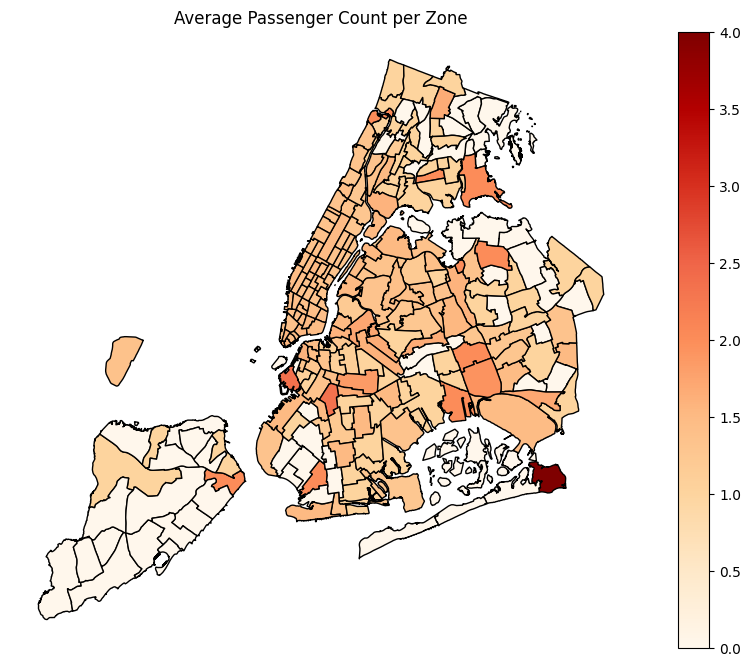

In [1461]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_by_zone = (
    merged.groupby('zone')['passenger_count']
    .mean()
    .reset_index()
    .rename(columns={'passenger_count': 'avg_passenger_count'})
)

zones = zones.merge(avg_passenger_by_zone, on='zone', how='left')

zones['avg_passenger_count'] = zones['avg_passenger_count'].fillna(0)

zones.plot(
    column='avg_passenger_count',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    figsize=(12, 8)
)
plt.title("Average Passenger Count per Zone")
plt.axis('off')
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

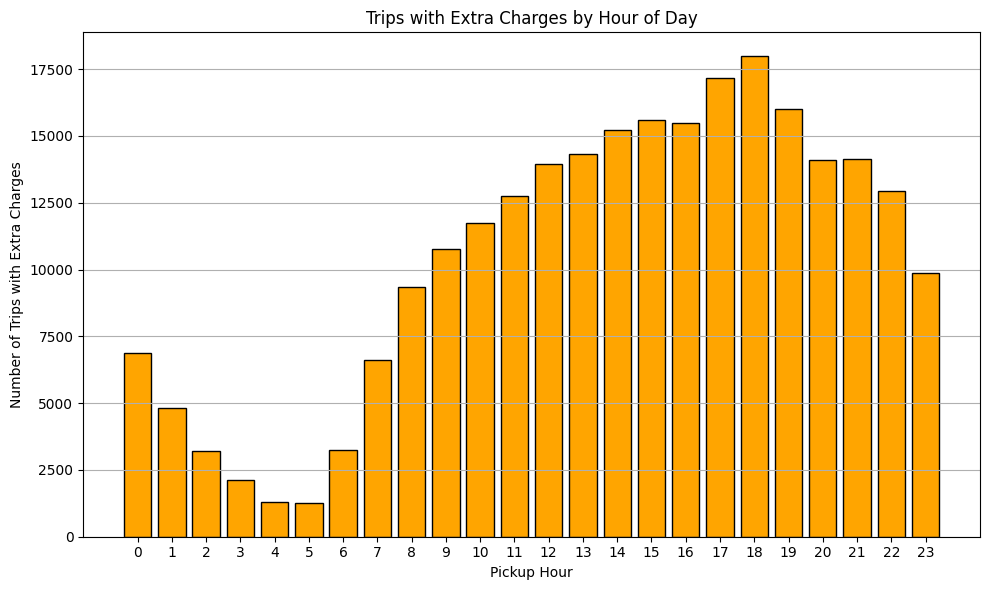

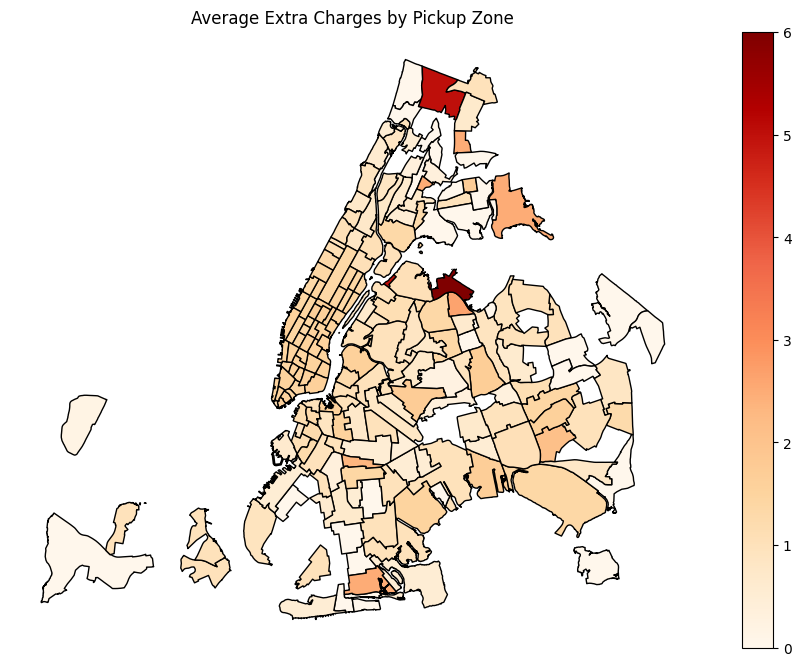

In [1465]:
# How often is each surcharge applied?

extra_by_hour = merged.groupby('tpep_pickup_hour')['extra'].agg(['count', 'mean', 'median', 'max']).reset_index()
extra_by_hour.columns = ['pickup_hour', 'num_trips_with_extra', 'avg_extra', 'median_extra', 'max_extra']

extra_by_zone = merged.groupby('zone')['extra'].agg(['count', 'mean', 'median', 'max']).reset_index()
extra_by_zone.columns = ['zone', 'num_trips_with_extra', 'avg_extra', 'median_extra', 'max_extra']
extra_by_zone = extra_by_zone.sort_values('num_trips_with_extra', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(extra_by_hour['pickup_hour'], extra_by_hour['num_trips_with_extra'], color='orange', edgecolor='black')
plt.title("Trips with Extra Charges by Hour of Day")
plt.xlabel("Pickup Hour")
plt.ylabel("Number of Trips with Extra Charges")
plt.xticks(range(24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

zones = zones.merge(extra_by_zone[['zone', 'avg_extra']], on='zone', how='left')

zones.plot(
    column='avg_extra',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    figsize=(12, 8)
)
plt.title("Average Extra Charges by Pickup Zone")
plt.axis('off')
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [1470]:

# Optimization of Routing and Dispatching
#1. Optimize night dispatch by increasing the deployments in regions with high night pickup count.
#2. Concentrate deployments in zones where the pickup count is high. Top 5 zones are 237, 161, 236, 162, 186.
#3. Optimize the deployments in alignment with the hourly pickup trends per zone. Follow the Top 10 zones graphs for guidance.
#4. Increase the number of deployments to zones where pickup/drop_off ratio is high.
#5. Optimize deployment of larger vehicles by restricting to zones where the average passenger count per zone is higher.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [1473]:

#1. Reduce the number of overall deployments between 00:00 and 06:00. However, optimize by increasing the deployments in regions with high night pickup count.
#2. Reduce the number of overall deployments on weekends.
#3. Reduce overall cab deployments in Q3.
#4. Reduce the number of overall deployments between 00:00 and 06:00.
#5. Increase the number of overall deployments between 16:00 to 20:00 on weekdays.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [1476]:

#Following inclusions can be evaluated to be introduced into the pricing strategy:
#1. Weekend Surcharge per mile
#2. Extra Passenger Surcharge per additional passenger
#3. Late night surcharge between 00:00 to 06:00
#4. Zone based surcharges if possible
#5. Demand Based Dynamic Pricing - increase earning potential of peak hours
#6. Standardization of price per mile across vendors particularly for short distances.
